## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

## Read Dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

### 1. Dropping unnecessary columns

In [5]:
# ID is not necessary for regression
df = df.drop(['Id'],axis=1)

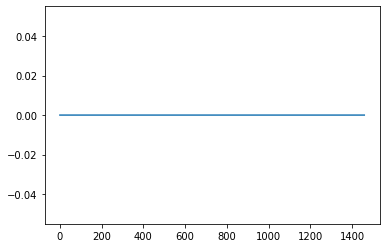

In [6]:
# TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
# Let us verify that
plt.plot(df.TotalBsmtSF - df.BsmtFinSF1-df.BsmtFinSF2-df.BsmtUnfSF)

In [7]:
# So we can drop TotalBsmtSF
df = df.drop(['TotalBsmtSF'],axis=1)

Alley, PoolQC and MiscFeature have very few non-null values, so let's drop them

In [8]:
# So we can drop TotalBsmtSF
df = df.drop(['Alley', 'PoolQC', 'MiscFeature'],axis=1)

### 2. Dealing with the nulls

In [9]:
for i in df[df.columns[df.isnull().any()]].columns:
    print('- ',i)

-  LotFrontage
-  MasVnrType
-  MasVnrArea
-  BsmtQual
-  BsmtCond
-  BsmtExposure
-  BsmtFinType1
-  BsmtFinType2
-  Electrical
-  FireplaceQu
-  GarageType
-  GarageYrBlt
-  GarageFinish
-  GarageQual
-  GarageCond
-  Fence


In [10]:
df.MasVnrType.fillna('NA',inplace=True)
df.MasVnrArea.fillna(0,inplace=True)
df.BsmtQual.fillna('NA',inplace=True)
df.BsmtCond.fillna('NA',inplace=True)
df.BsmtExposure.fillna('NA',inplace=True)
df.BsmtFinType1.fillna('NA',inplace=True)
df.BsmtFinType2.fillna('NA',inplace=True)
df.FireplaceQu.fillna('NA',inplace=True)
df.GarageType.fillna('NA',inplace=True)
df.GarageFinish.fillna('NA',inplace=True)
df.GarageQual.fillna('NA',inplace=True)
df.GarageCond.fillna('NA',inplace=True)
df.Fence.fillna('NA',inplace=True)

In [11]:
# Since it is just one rowm Let's drop the null rows for Electrical
df.dropna(subset=['Electrical'],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1200 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

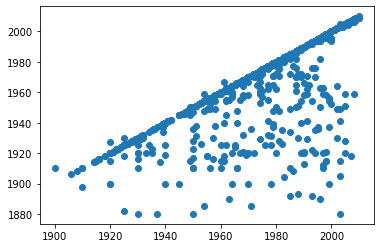

In [13]:
plt.scatter(df.GarageYrBlt,df. YearBuilt)

In [14]:
df[['GarageYrBlt','YearBuilt']].corr()

GarageYrBlt  YearBuilt
GarageYrBlt     1.000000   0.825503
YearBuilt       0.825503   1.000000

Due to such strong linearity, we can simply remove GarageYrBlt

In [15]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [16]:
#Let's just remove all the null rows in LotFrontage
df.dropna(subset=['LotFrontage'],inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1200 non-null   int64  
 1   MSZoning       1200 non-null   object 
 2   LotFrontage    1200 non-null   float64
 3   LotArea        1200 non-null   int64  
 4   Street         1200 non-null   object 
 5   LotShape       1200 non-null   object 
 6   LandContour    1200 non-null   object 
 7   Utilities      1200 non-null   object 
 8   LotConfig      1200 non-null   object 
 9   LandSlope      1200 non-null   object 
 10  Neighborhood   1200 non-null   object 
 11  Condition1     1200 non-null   object 
 12  Condition2     1200 non-null   object 
 13  BldgType       1200 non-null   object 
 14  HouseStyle     1200 non-null   object 
 15  OverallQual    1200 non-null   int64  
 16  OverallCond    1200 non-null   int64  
 17  YearBuilt      1200 non-null   int64  
 18  YearRemo

### 3. Outlier Removal

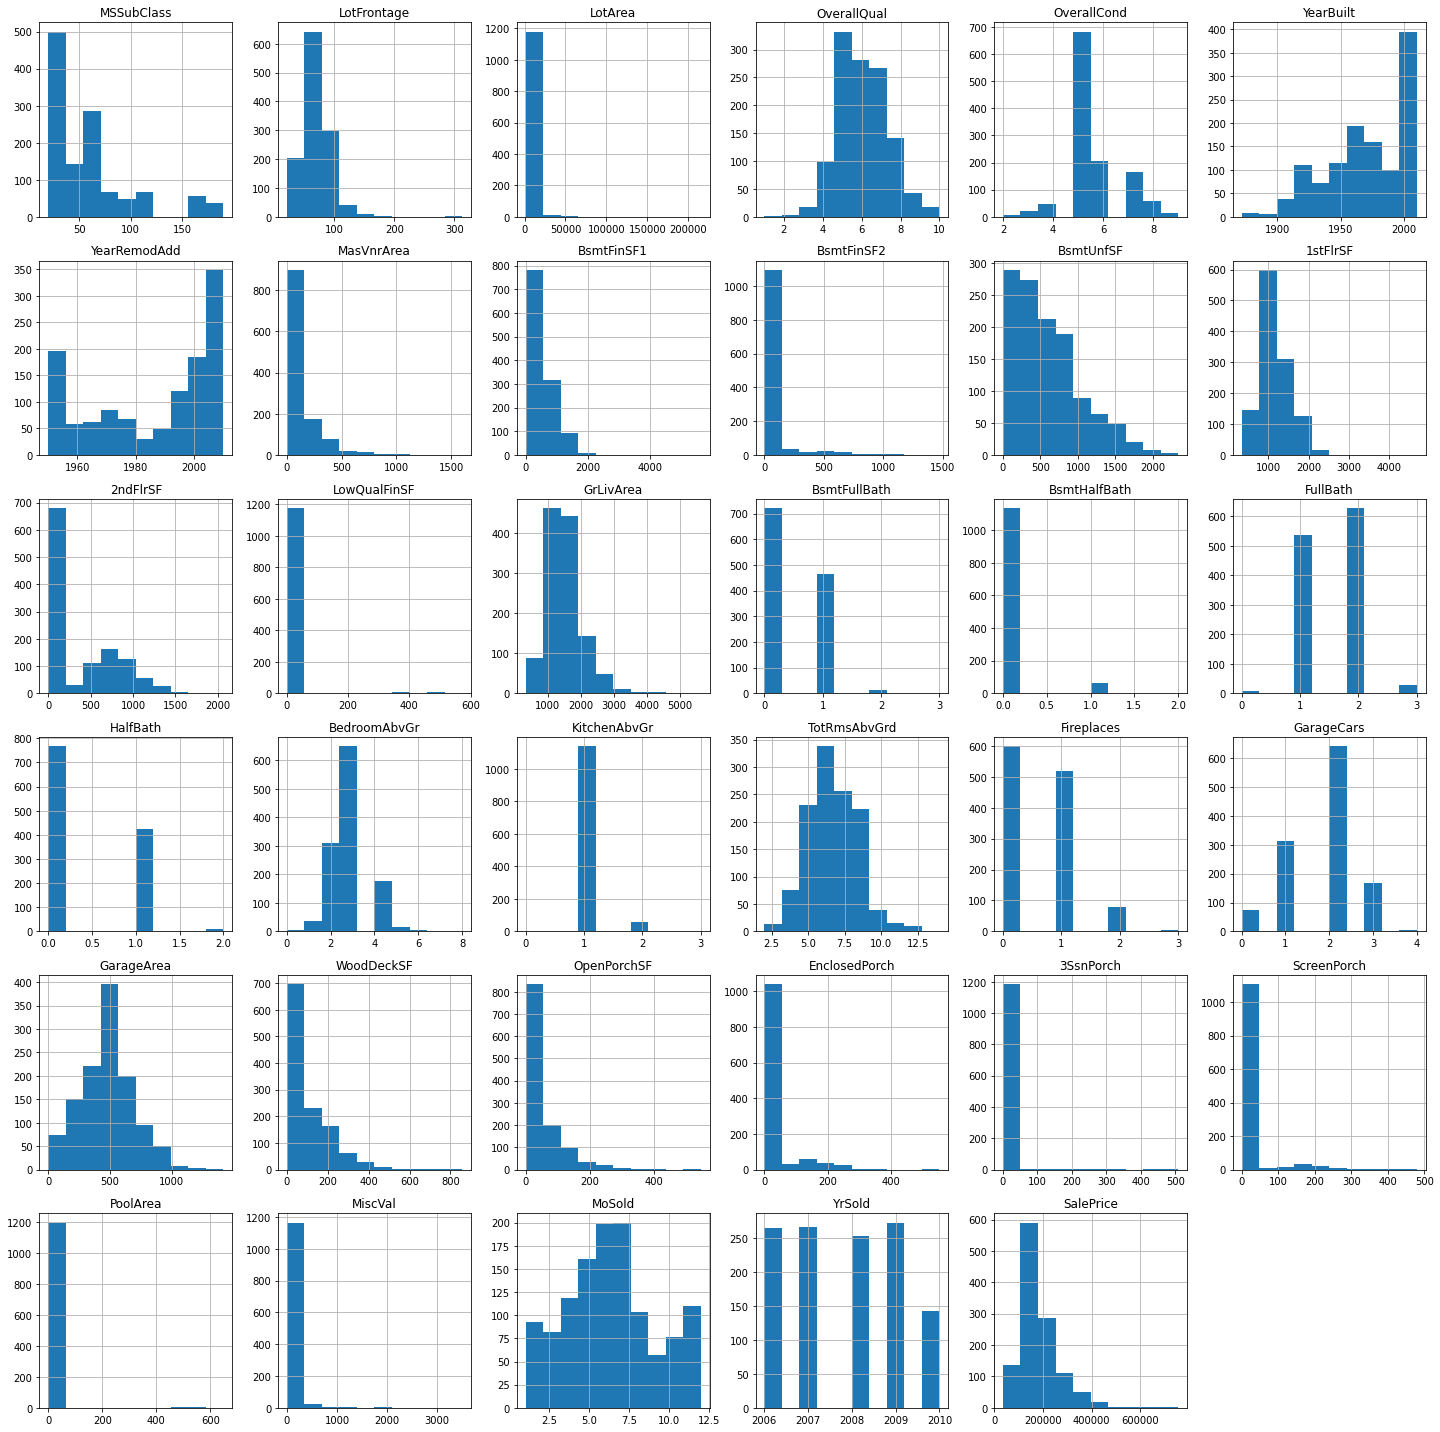

In [18]:
df.hist(figsize=(20, 20));
plt.tight_layout();

In [19]:
columns_to_work_on = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','LowQualFinSF','WoodDeckSF',
                     'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
# Let's find the number of rows under 95 percentile for each of these columns
for column in columns_to_work_on:
    q_hi  = df[column].quantile(0.95)
    print(column,len(df[(df[column] < q_hi)]))

LotArea 1140
MasVnrArea 1140
BsmtFinSF1 1140
BsmtFinSF2 1140
LowQualFinSF 0
WoodDeckSF 1139
OpenPorchSF 1139
EnclosedPorch 1140
3SsnPorch 0
ScreenPorch 1140
PoolArea 0
MiscVal 0


Let us analyse the zero columns individually

### PoolArea

In [20]:
df[df.PoolArea>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
197           75       RL        174.0    25419   Pave      Reg         Lvl   
810           20       RL         78.0    10140   Pave      Reg         Lvl   
1170          80       RL         76.0     9880   Pave      Reg         Lvl   
1182          60       RL        160.0    15623   Pave      IR1         Lvl   
1298          60       RL        313.0    63887   Pave      IR3         Bnk   
1386          60       RL         80.0    16692   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea  Fence  \
197     AllPub    Corner       Gtl  ...         0           0      512  GdPrv   
810     AllPub    Inside       Gtl  ...         0           0      648  GdPrv   
1170    AllPub    Inside       Gtl  ...         0           0      576  GdPrv   
1182    AllPub    Corner       Gtl  ...         0           0      555  MnPrv   
1298    AllPub    Corner       Gtl  ...         0           0      480     NA   
1386    AllPub    Inside       Gtl  ...         0         440      519  MnPrv   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
197        0       3    2006        WD        Abnorml    235000  
810        0       1    2006        WD         Normal    181000  
1170       0       7    2008        WD         Normal    171000  
1182       0       7    2007        WD        Abnorml    745000  
1298       0       1    2008       New        Partial    160000  
1386    2000       7    2006        WD         Normal    250000  

[6 rows x 75 columns]

Since only 7 rows have nonzero PoolArea, we can just remove the column

In [21]:
df.drop(['PoolArea'],axis=1,inplace=True)

### LowQualFinSF

In [22]:
df[df.LowQualFinSF>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
51            50       RM         52.0     6240   Pave      Reg         Lvl   
88            50  C (all)        105.0     8470   Pave      IR1         Lvl   
125          190       RM         60.0     6780   Pave      Reg         Lvl   
185           75       RM         90.0    22950   Pave      IR2         Lvl   
187           50       RL         60.0    10410   Pave      Reg         Lvl   
197           75       RL        174.0    25419   Pave      Reg         Lvl   
198           75       RM         92.0     5520   Pave      Reg         Lvl   
263           50       RM         50.0     5500   Pave      Reg         Lvl   
267           75       RL         60.0     8400   Pave      Reg         Bnk   
406           50       RL         51.0    10480   Pave      Reg         Lvl   
589           40       RM         50.0     9100   Pave      Reg         Lvl   
635          190       RH         60.0    10896   Pave      Reg         Bnk   
729           30       RM         52.0     6240   Pave      Reg         Lvl   
829          160       FV         24.0     2544   Pave      Reg         Lvl   
831          160       FV         30.0     3180   Pave      Reg         Lvl   
873           40       RL         60.0    12144   Pave      Reg         Lvl   
883           75       RL         60.0     6204   Pave      Reg         Bnk   
945           50       RM         98.0     8820   Pave      Reg         Lvl   
1009          50       RL         60.0     6000   Pave      Reg         Lvl   
1031          75       RL        102.0    15863   Pave      Reg         Lvl   
1173          50       RL        138.0    18030   Pave      IR1         Bnk   
1349          70       RM         50.0     5250   Pave      Reg         Lvl   
1364         160       FV         30.0     3180   Pave      Reg         Lvl   
1440          70       RL         79.0    11526   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
51      AllPub    Inside       Gtl  ...             0         0           0   
88      AllPub    Corner       Gtl  ...           156         0           0   
125     AllPub    Inside       Gtl  ...             0         0           0   
185     AllPub    Inside       Gtl  ...             0         0         410   
187     AllPub    Inside       Gtl  ...             0       140           0   
197     AllPub    Corner       Gtl  ...           552         0           0   
198     AllPub    Corner       Gtl  ...            30         0           0   
263     AllPub    Corner       Gtl  ...             0         0           0   
267     AllPub    Inside       Mod  ...             0         0           0   
406     AllPub    Inside       Gtl  ...             0         0           0   
589     AllPub    Inside       Gtl  ...             0         0           0   
635     AllPub    Inside       Gtl  ...             0         0           0   
729     AllPub    Inside       Gtl  ...           112         0           0   
829     AllPub    Inside       Gtl  ...             0         0           0   
831     AllPub    Inside       Gtl  ...             0         0           0   
873     AllPub    Inside       Gtl  ...             0         0           0   
883     AllPub    Inside       Gtl  ...             0         0           0   
945     AllPub    Corner       Gtl  ...           244         0           0   
1009    AllPub    Inside       Gtl  ...           138         0           0   
1031    AllPub    Corner       Gtl  ...             0         0           0   
1173    AllPub    Inside       Gtl  ...             0         0           0   
1349    AllPub    Inside       Gtl  ...            20         0           0   
1364    AllPub    Inside       Gtl  ...             0         0           0   
1440    AllPub    Inside       Mod  ...             0         0           0   

      Fence MiscVal  MoSold  YrSold  SaleType  SaleCon

Since only 26 rows have nonzero LowQualFinSF, we can just remove the column

In [23]:
df.drop(['LowQualFinSF'],axis=1,inplace=True)

### 3SsnPorch

In [24]:
df[df['3SsnPorch']>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
5             50       RL         85.0    14115   Pave      IR1         Lvl   
55            20       RL        100.0    10175   Pave      IR1         Lvl   
129           20       RL         69.0     8973   Pave      Reg         Lvl   
159           60       RL        134.0    19378   Pave      IR1         HLS   
182           20       RL         60.0     9060   Pave      Reg         Lvl   
187           50       RL         60.0    10410   Pave      Reg         Lvl   
205           20       RL         99.0    11851   Pave      Reg         Lvl   
258           60       RL         80.0    12435   Pave      Reg         Lvl   
280           60       RL         82.0    11287   Pave      Reg         Lvl   
546           50       RL         70.0     8737   Pave      IR1         Bnk   
704           20       RL         70.0     8400   Pave      Reg         Lvl   
744          120       RL         41.0     5395   Pave      IR1         HLS   
889           20       RL        128.0    12160   Pave      Reg         Lvl   
922           20       RL         65.0    10237   Pave      Reg         Lvl   
1080          20       RL         80.0    11040   Pave      Reg         Lvl   
1156          80       RL         85.0     9350   Pave      Reg         Lvl   
1181         120       RM         64.0     5587   Pave      IR1         HLS   
1437          20       RL         96.0    12444   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
5       AllPub    Inside       Gtl  ...             0       320           0   
55      AllPub    Inside       Gtl  ...             0       407           0   
129     AllPub    Inside       Gtl  ...             0       180           0   
159     AllPub    Corner       Gtl  ...             0       168           0   
182     AllPub    Inside       Gtl  ...             0       180           0   
187     AllPub    Inside       Gtl  ...             0       140           0   
205     AllPub    Corner       Gtl  ...             0       508           0   
258     AllPub    Inside       Gtl  ...             0       245           0   
280     AllPub    Inside       Gtl  ...             0       196           0   
546     AllPub    Inside       Gtl  ...             0       144           0   
704     AllPub    Inside       Gtl  ...             0       144           0   
744     AllPub    Inside       Gtl  ...            70       168           0   
889     AllPub    Inside       Gtl  ...             0       162           0   
922     AllPub    Inside       Gtl  ...             0        23           0   
1080    AllPub    Inside       Gtl  ...             0       216           0   
1156    AllPub    Inside       Gtl  ...             0        96           0   
1181    AllPub    Inside       Mod  ...             0       153           0   
1437    AllPub       FR2       Gtl  ...             0       304           0   

      Fence MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
5     MnPrv     700      10    2009        WD         Normal    143000  
55       NA       0       7    2008        WD         Normal    180500  
129    MnWw       0       7    2006        WD        Abnorml    150000  
159      NA       0       3    2006       New        Partial    320000  
182   MnPrv       0       6    2007        WD         Normal    120000  
187   MnPrv       0       8    2009        WD         Normal    135000  
205      NA       0       5    2009        WD         Normal    180500  
258      NA       0       5    2008        WD         Normal    231500  
280      NA       0       1    2007        WD         Normal    228500  
546      NA       0       5    2007        WD         Normal    210000  
704      NA       0       5    2010        WD         Normal    213000  
744      NA       0      10    2008        WD         Normal    180000  
889      NA       0       2    2009        WD        

Since only 24 rows have nonzero LowQualFinSF, we can just remove the column

In [25]:
df.drop(['3SsnPorch'],axis=1,inplace=True)

### MiscVal

In [26]:
df[df.MiscVal>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
5             50       RL         85.0    14115   Pave      IR1         Lvl   
17            90       RL         72.0    10791   Pave      Reg         Lvl   
51            50       RM         52.0     6240   Pave      Reg         Lvl   
98            30       RL         85.0    10625   Pave      Reg         Lvl   
99            20       RL         77.0     9320   Pave      IR1         Lvl   
106           30       RM         60.0    10800   Pave      Reg         Lvl   
250           30       RL         55.0     5350   Pave      IR1         Lvl   
338           20       RL         91.0    14145   Pave      Reg         Lvl   
439           50       RL         67.0    12354   Pave      Reg         Lvl   
499           20       RL         70.0     7535   Pave      IR1         Lvl   
502           20       RL         70.0     9170   Pave      Reg         Lvl   
510           20       RL         75.0    14559   Pave      Reg         Lvl   
589           40       RM         50.0     9100   Pave      Reg         Lvl   
634           90       RL         64.0     6979   Pave      Reg         Lvl   
705          190       RM         70.0     5600   Pave      Reg         Lvl   
725           20       RL         60.0     6960   Pave      Reg         Lvl   
733           20       RL         80.0    10000   Pave      Reg         Lvl   
760           20       RL         70.0     9100   Pave      Reg         Lvl   
766           60       RL         80.0    10421   Pave      Reg         Lvl   
767           50       RL         75.0    12508   Pave      IR1         Lvl   
786           50       RM         60.0    10800   Pave      Reg         Lvl   
800           60       RL         79.0    12798   Pave      IR1         HLS   
812           20  C (all)         66.0     8712   Grvl      Reg         Bnk   
813           20       RL         75.0     9750   Pave      Reg         Lvl   
867           20       RL         85.0     6970   Pave      Reg         Lvl   
878           85       RL         88.0    11782   Pave      IR1         Lvl   
890           50       RL         60.0     8064   Pave      Reg         Lvl   
912           30       RM         51.0     6120   Pave      Reg         Lvl   
1061          30  C (all)        120.0    18000   Grvl      Reg         Low   
1076          50       RL         60.0    10800   Pave      Reg         Lvl   
1083          20       RL         80.0     8800   Pave      Reg         Lvl   
1171          20       RL         76.0     9120   Pave      Reg         Lvl   
1210          60       RL         70.0    11218   Pave      Reg         Lvl   
1252          20       RL         62.0     9858   Pave      Reg         Lvl   
1328          50       RM         60.0    10440   Pave      Reg         Lvl   
1386          60       RL         80.0    16692   Pave      IR1         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch ScreenPorch  \
5       AllPub    Inside       Gtl  ...          30             0           0   
17      AllPub    Inside       Gtl  ...           0             0           0   
51      AllPub    Inside       Gtl  ...           0             0           0   
98      AllPub    Corner       Gtl  ...           0            77           0   
99      AllPub    Inside       Gtl  ...           0             0           0   
106     AllPub    Inside       Gtl  ...           0             0           0   
250     AllPub    Inside       Gtl  ...           0             0           0   
338     AllPub    Corner       Gtl  ...          45             0           0   
439     AllPub    Corner       Gtl  ...          46             0           0   
499     AllPub    Inside       Gtl  ...         285             0           0   
502     AllPub    Corner       Gtl  ...           0           184           0   
510     AllPub    Inside       

Since only 52 rows have nonzero MiscVal, we can just remove the column

In [27]:
df.drop(['MiscVal'],axis=1,inplace=True)

Now let's check again

In [28]:
columns_to_work_on = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','WoodDeckSF',
                     'OpenPorchSF','EnclosedPorch','ScreenPorch']
# Let's find the number of rows under 95 percentile for each of these columns
for column in columns_to_work_on:
    q_hi  = df[column].quantile(0.99)
    print(column,len(df[(df[column] < q_hi)]))

LotArea 1188
MasVnrArea 1188
BsmtFinSF1 1188
BsmtFinSF2 1188
WoodDeckSF 1188
OpenPorchSF 1188
EnclosedPorch 1188
ScreenPorch 1188


In [29]:
#Looks good. We can now drop the outlier rows
for column in columns_to_work_on:
    q_hi  = df[column].quantile(0.99)
    df = df[(df[column] < q_hi)]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1457
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1104 non-null   int64  
 1   MSZoning       1104 non-null   object 
 2   LotFrontage    1104 non-null   float64
 3   LotArea        1104 non-null   int64  
 4   Street         1104 non-null   object 
 5   LotShape       1104 non-null   object 
 6   LandContour    1104 non-null   object 
 7   Utilities      1104 non-null   object 
 8   LotConfig      1104 non-null   object 
 9   LandSlope      1104 non-null   object 
 10  Neighborhood   1104 non-null   object 
 11  Condition1     1104 non-null   object 
 12  Condition2     1104 non-null   object 
 13  BldgType       1104 non-null   object 
 14  HouseStyle     1104 non-null   object 
 15  OverallQual    1104 non-null   int64  
 16  OverallCond    1104 non-null   int64  
 17  YearBuilt      1104 non-null   int64  
 18  YearRemo

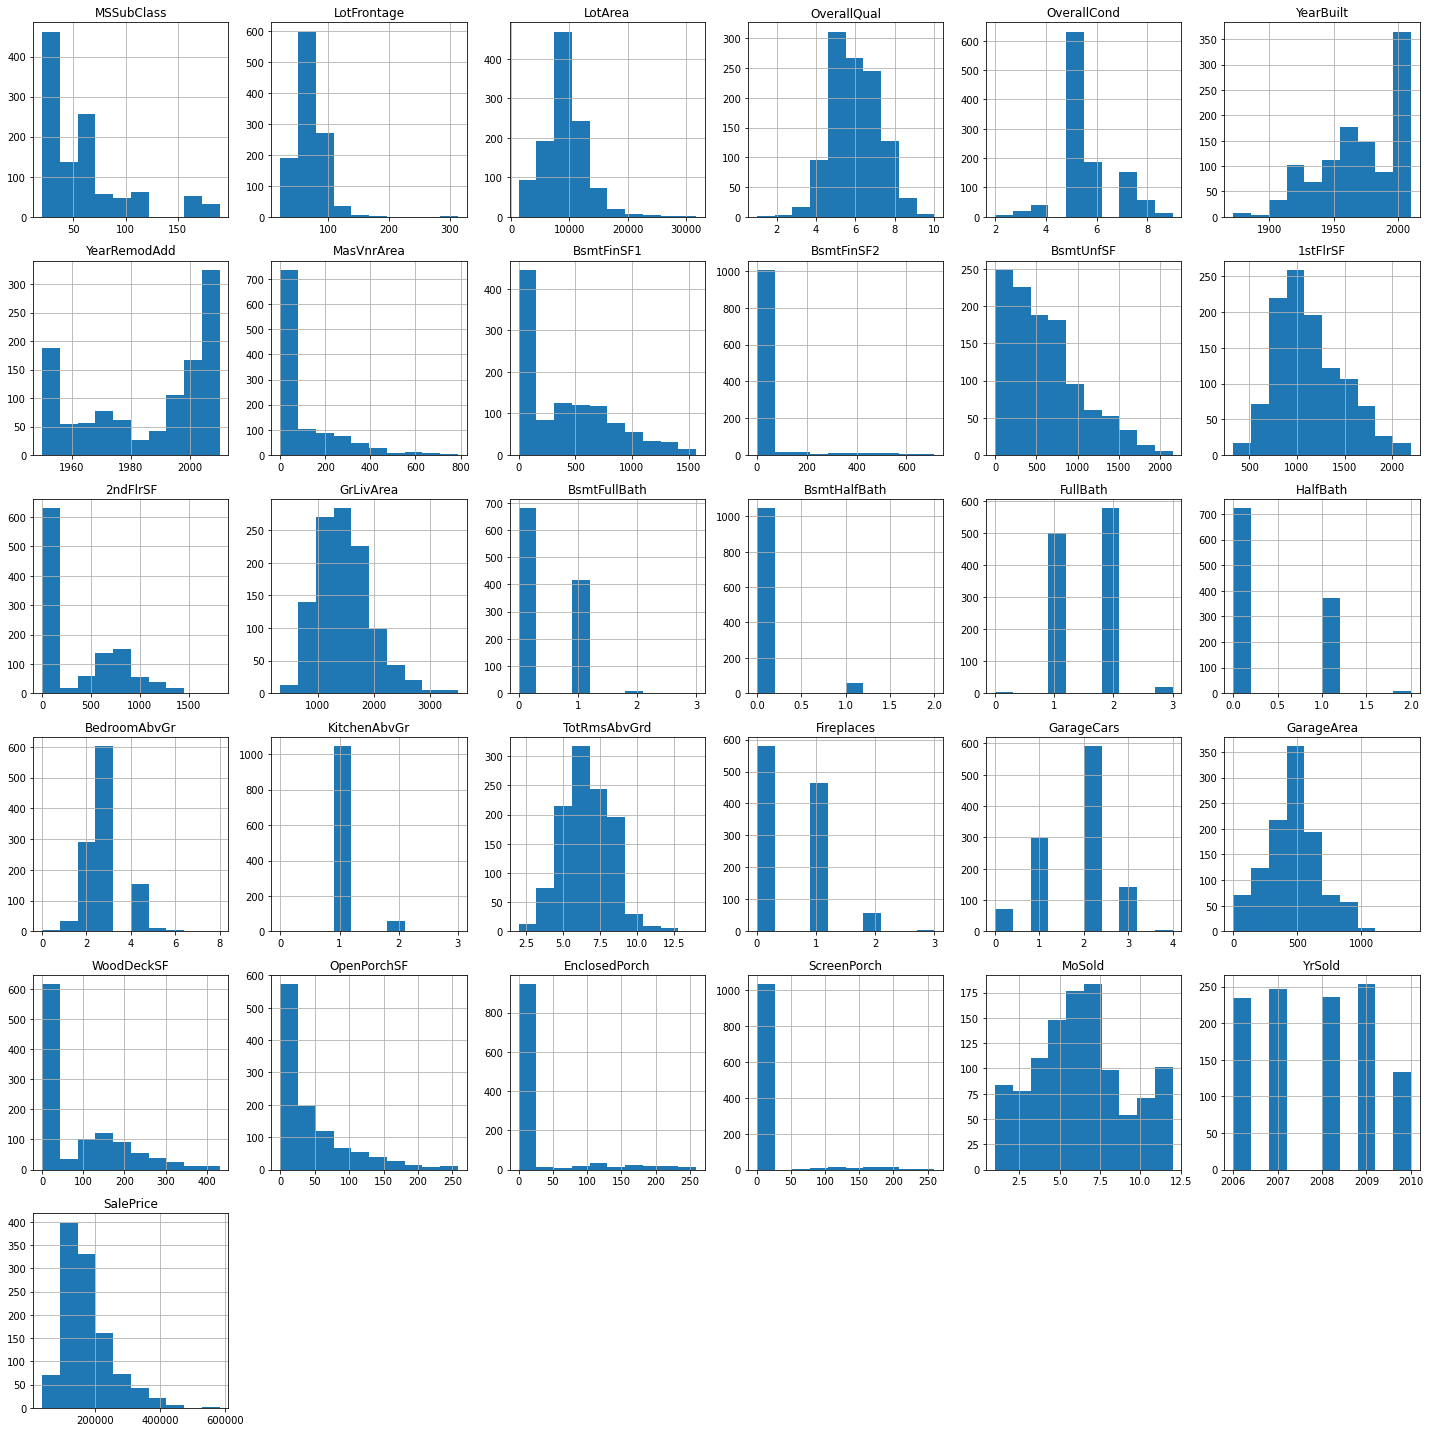

In [31]:
df.hist(figsize=(20, 20));
plt.tight_layout();

Let's try to find few more closely correlated terms

<AxesSubplot:>

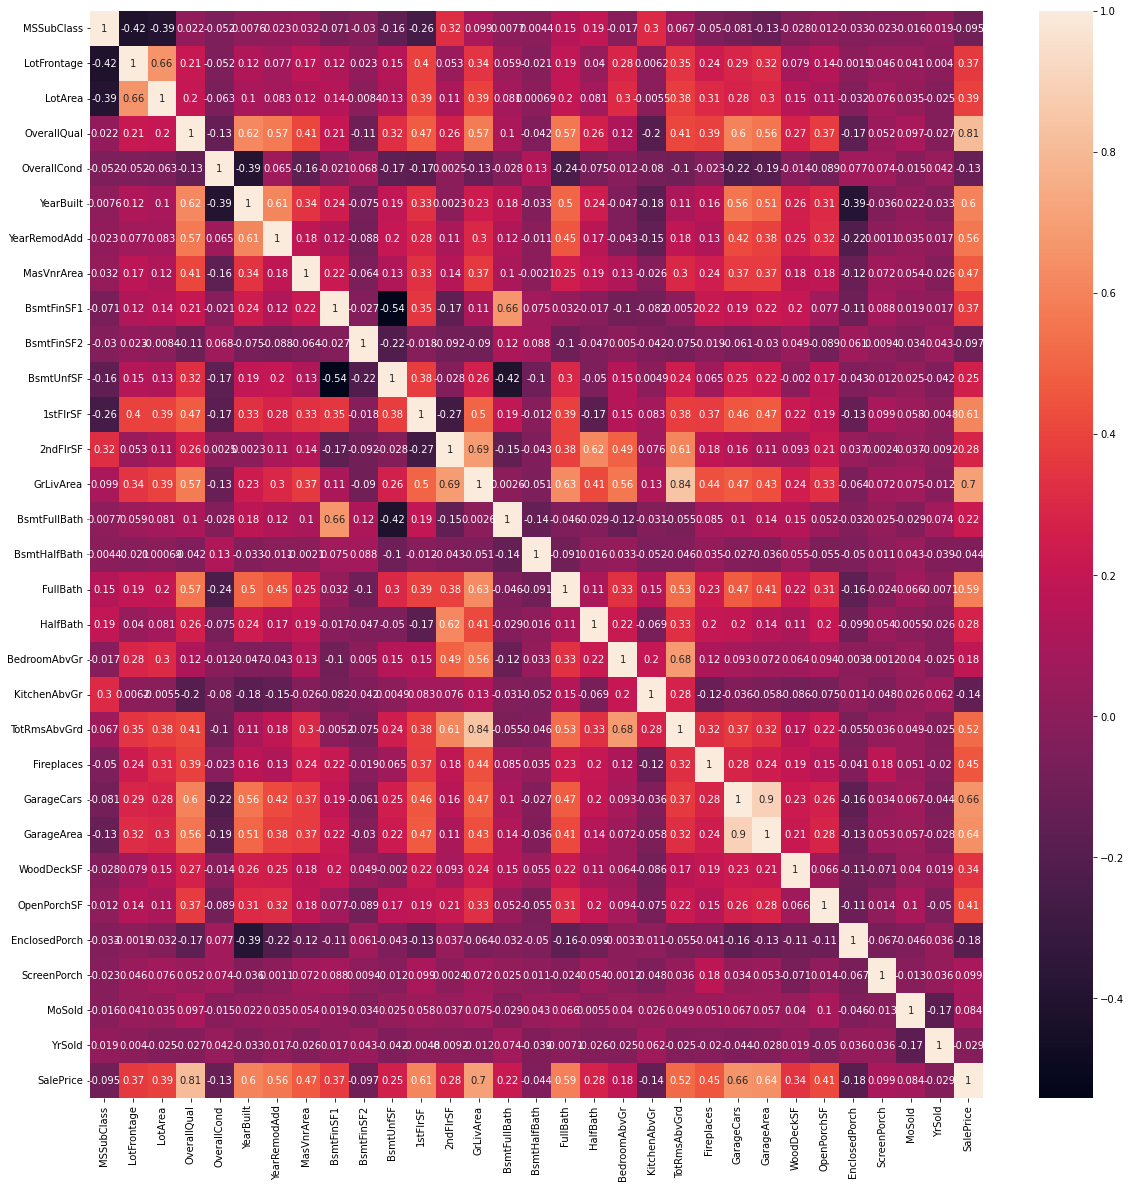

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'GrLivArea')

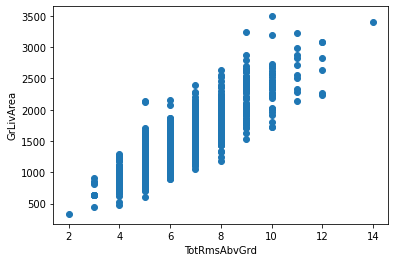

In [33]:
plt.scatter(df.TotRmsAbvGrd,df.GrLivArea)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')

Text(0, 0.5, 'GarageCars')

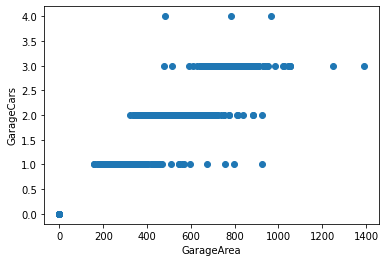

In [34]:
plt.scatter(df.GarageArea,df.GarageCars)
plt.xlabel('GarageArea')
plt.ylabel('GarageCars')

In [35]:
df.drop(['GarageCars','TotRmsAbvGrd'],axis=1,inplace=True)

## Categorizing the columns


In [36]:
num_cols = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
           'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF',
           'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
            'Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
           'ScreenPorch','MoSold','YrSold','MasVnrArea','SalePrice']
nom_cols = ['MSSubClass','MSZoning','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
            'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
           'Heating','Electrical','Functional','GarageType','SaleType',
           'SaleCondition']
ord_cols = ['Street','LotShape','LandContour','Utilities','LandSlope','ExterQual',
            'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
           'HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','PavedDrive','Fence']


## Basic EDA

<AxesSubplot:>

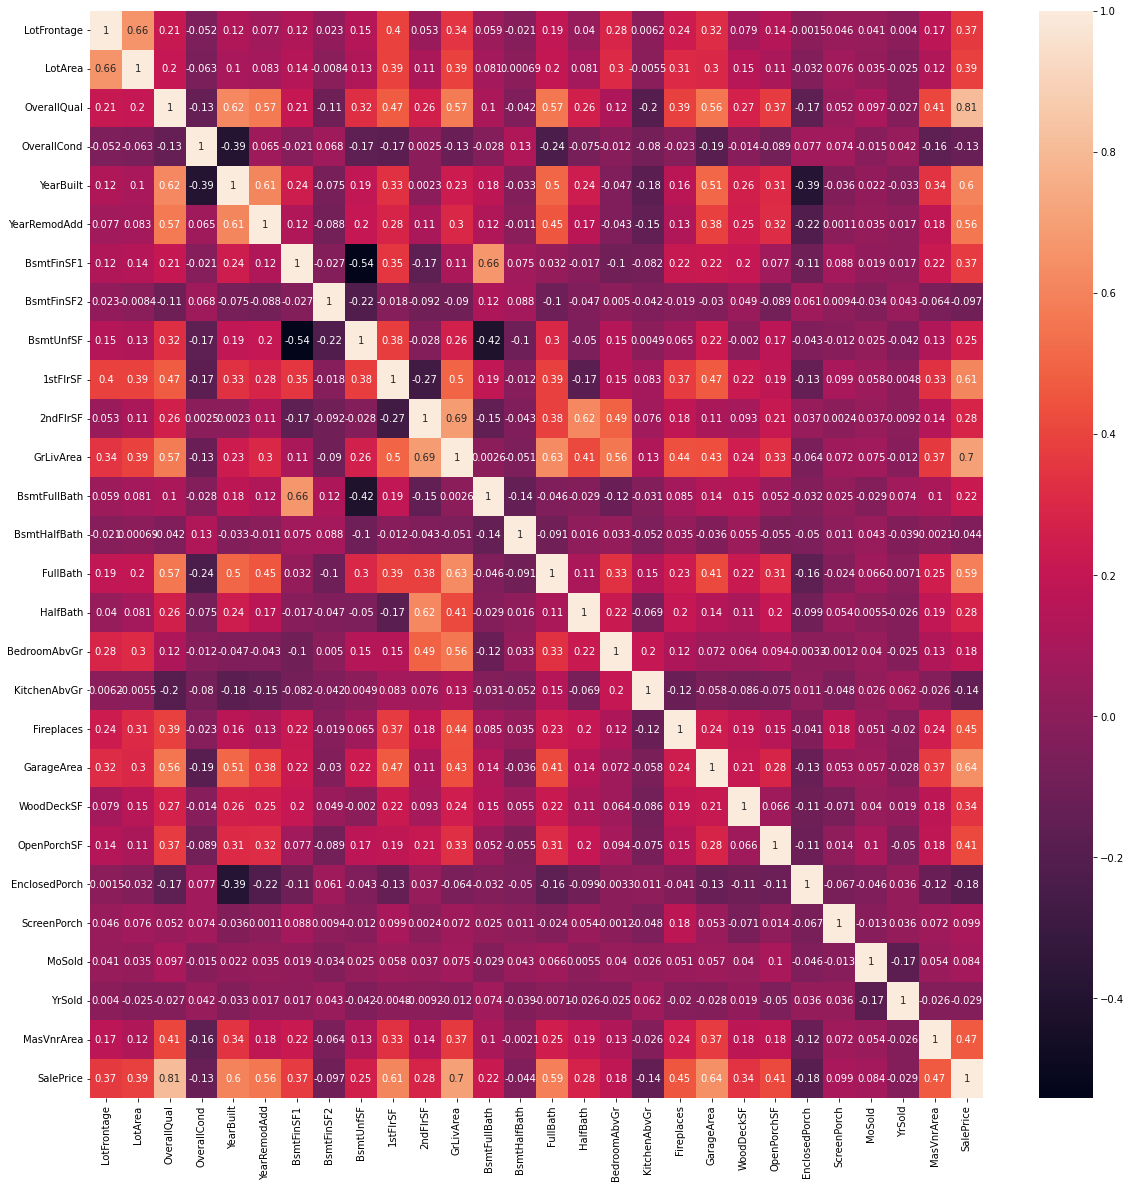

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df[num_cols].corr(),annot=True)

#### Let us now look at the impact of categorical variables on SalePrice

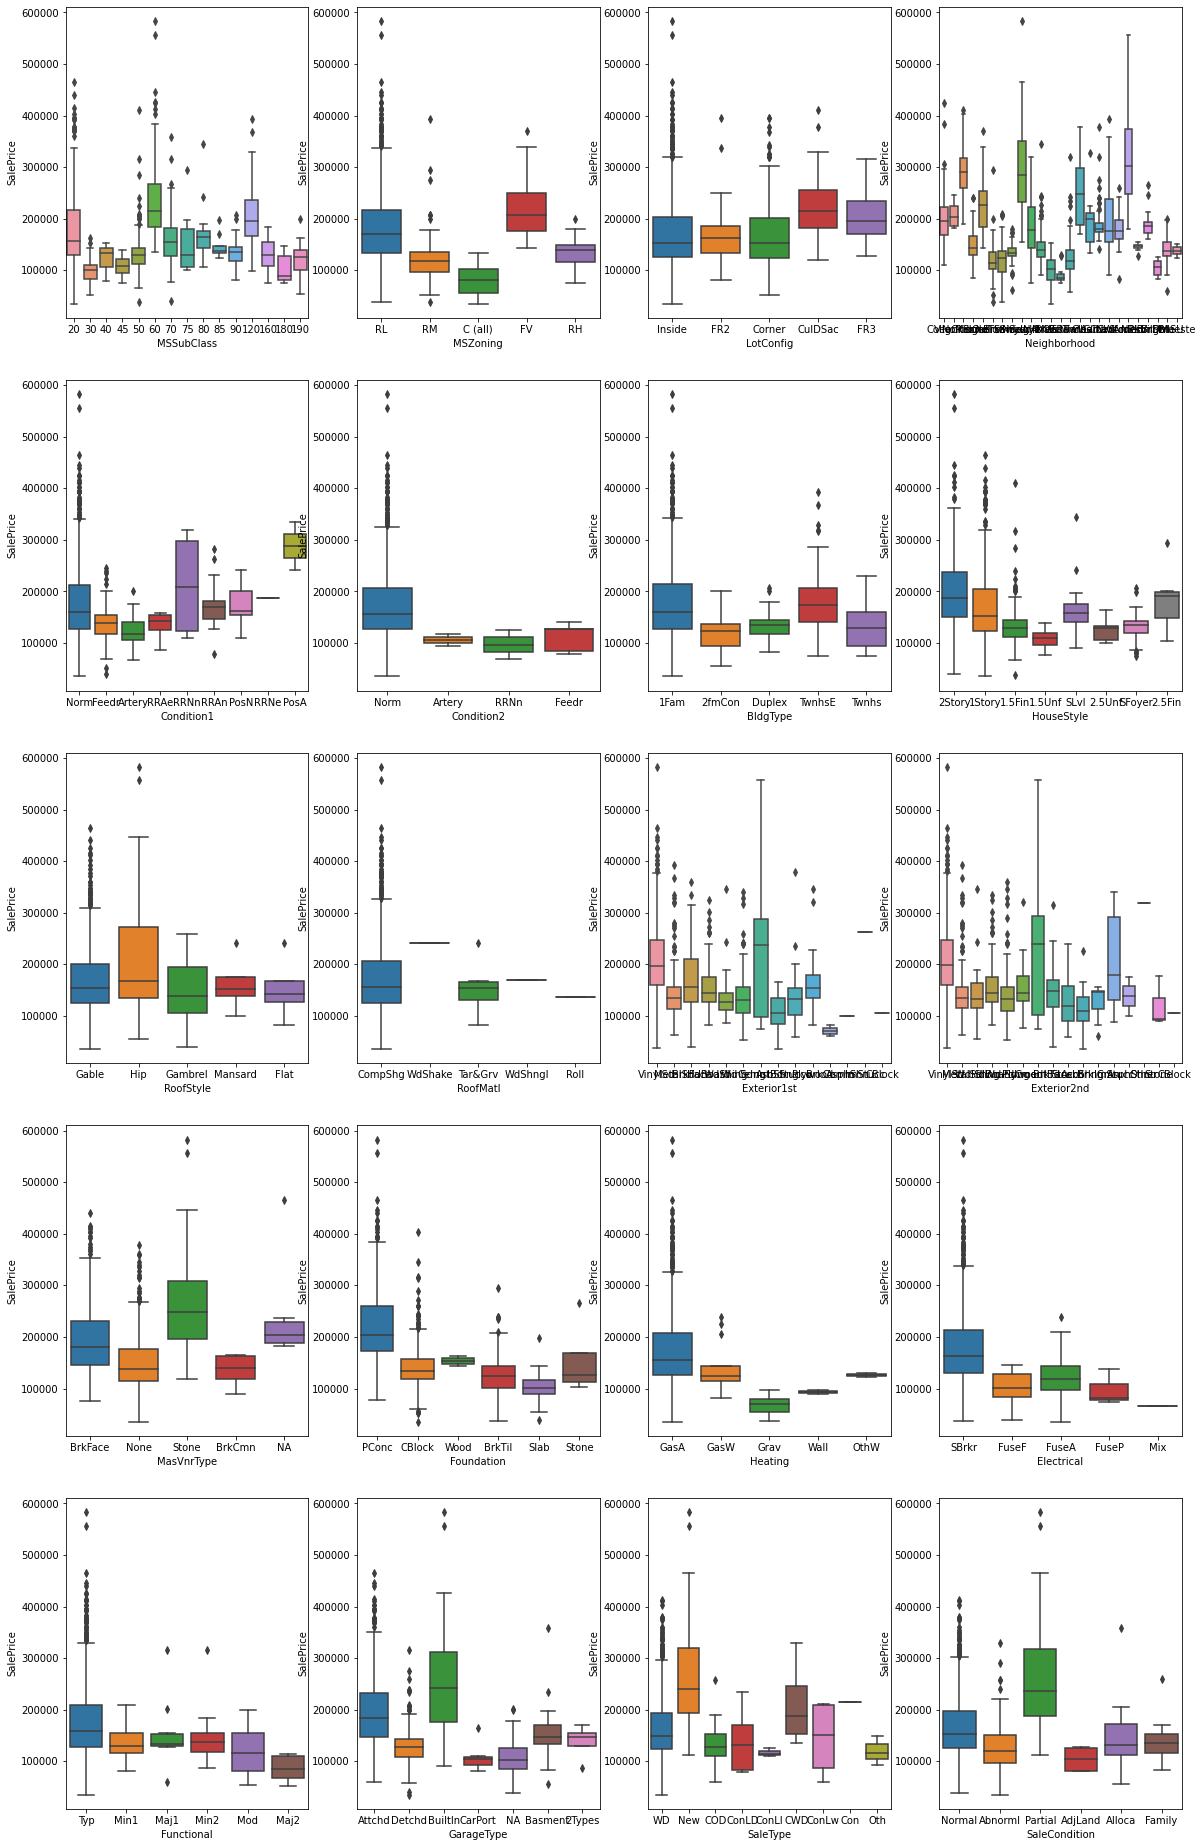

In [38]:
plt.figure(figsize=(20,40))
i = 1
for col in list(nom_cols):
    plt.subplot(len(nom_cols)//4+1,4,i)
    sns.boxplot(data=df, y = 'SalePrice',x = col)
    i+=1
plt.show()    

All nominal variables seem to have some effect on the SalePrice. We can't comment direct which ones we wouldn't need

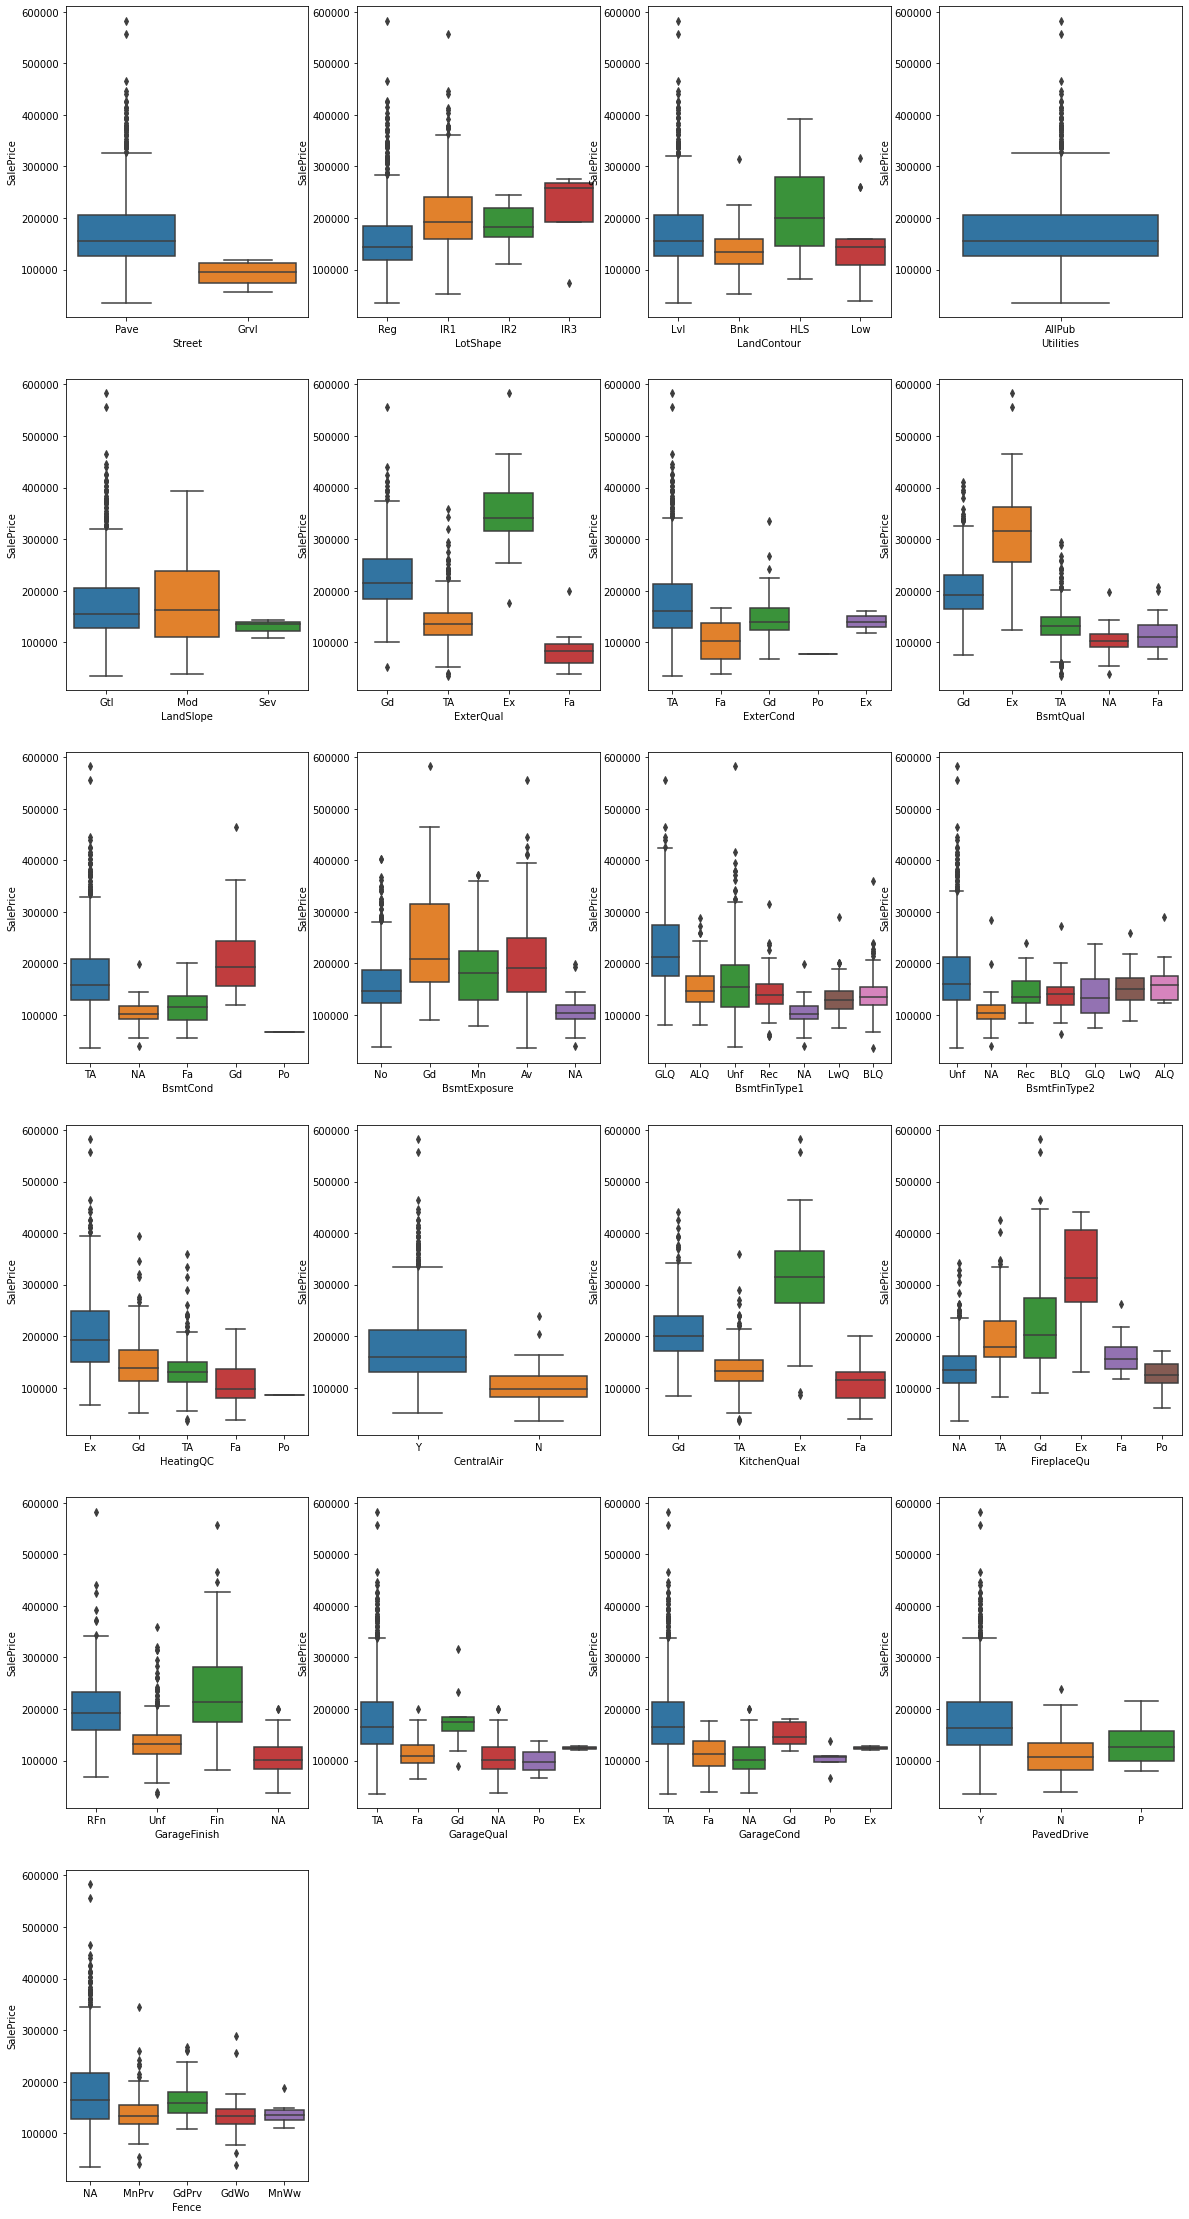

In [39]:
plt.figure(figsize=(20,40))
i = 1
for col in list(ord_cols):
    plt.subplot(len(ord_cols)//4+1,4,i)
    sns.boxplot(data=df, y = 'SalePrice',x = col)
    i+=1
plt.show()    

In [40]:
# All utilities seem to have only one value: AllPub. hence we see we can remove Utilites
df.drop(['Utilities'],axis=1,inplace=True)
ord_cols.remove('Utilities')

All ordinal variables seem to have some effect on the SalePrice. We can't comment direct which ones we wouldn't need

## Feature Engineering

### Nominal to numeric
Turn Nominal data into numeric vectors

In [41]:
for col in nom_cols:
    df[col] = df[col].apply(lambda x: col+'_'+str(x))
    status = pd.get_dummies(df[col],drop_first=True)
    df = pd.concat([df,status],axis=1)
    df=df.drop(col,axis=1)

In [42]:
df.head()

LotFrontage  LotArea Street LotShape LandContour LandSlope  OverallQual  \
0         65.0     8450   Pave      Reg         Lvl       Gtl            7   
1         80.0     9600   Pave      Reg         Lvl       Gtl            6   
2         68.0    11250   Pave      IR1         Lvl       Gtl            7   
4         84.0    14260   Pave      IR1         Lvl       Gtl            8   
5         85.0    14115   Pave      IR1         Lvl       Gtl            5   

   OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI SaleType_ConLw  \
0            5       2003          2003  ...               0              0   
1            8       1976          1976  ...               0              0   
2            5       2001          2002  ...               0              0   
4            5       2000          2000  ...               0              0   
5            5       1993          1995  ...               0              0   

  SaleType_New SaleType_Oth SaleType_WD SaleCondition_AdjLand  \
0            0            0           1                     0   
1            0            0           1                     0   
2            0            0           1                     0   
4            0            0           1                     0   
5            0            0           1                     0   

  SaleCondition_Alloca  SaleCondition_Family SaleCondition_Normal  \
0                    0                     0                    1   
1                    0                     0                    1   
2                    0                     0                    1   
4                    0                     0                    1   
5                    0                     0                    1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
4                      0  
5                      0  

[5 rows x 193 columns]

### Ordinal to numeric
Turn Ordinal data into numbers

In [43]:
# ['Street','LotShape','LandContour','Utilities','LandSlope','ExterQual',
#             'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
#            'HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageFinish',
#            'GarageQual','GarageCond','PavedDrive','Fence']
df['Street'] = df.Street.map({'Grvl':0,'Pave':1})
df['LotShape'] = df.LotShape.map({'IR3':0,'IR2':1,'IR1':2,'Reg':3})
df['LandContour'] = df.LandContour.map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['FireplaceQu'] = df.FireplaceQu.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['PavedDrive'] = df.PavedDrive.map({'N':0,'P':1,'Y':2})
df['Fence'] = df.Fence.map({'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})


<AxesSubplot:>

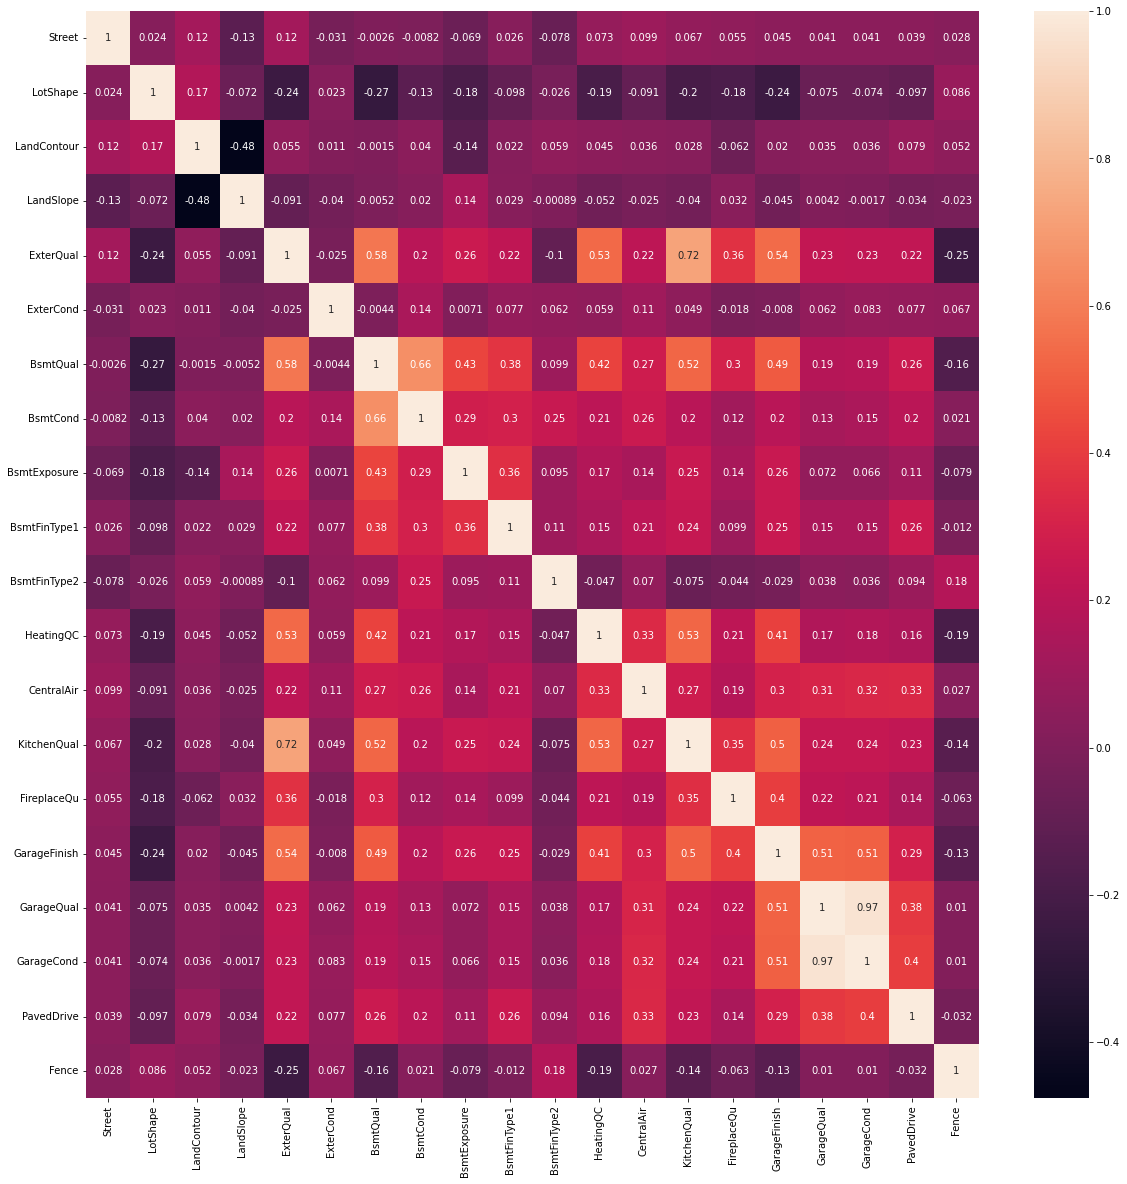

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(df[ord_cols].corr(),annot=True)

In [45]:
# Also observe the strong correlation between GarageQual and GarageCond.
# Let's remove GarageQual (it doesn't sound right. No one uses that phrase)
df.drop(['GarageQual'],axis=1,inplace=True)
ord_cols.remove('GarageQual')

<AxesSubplot:>

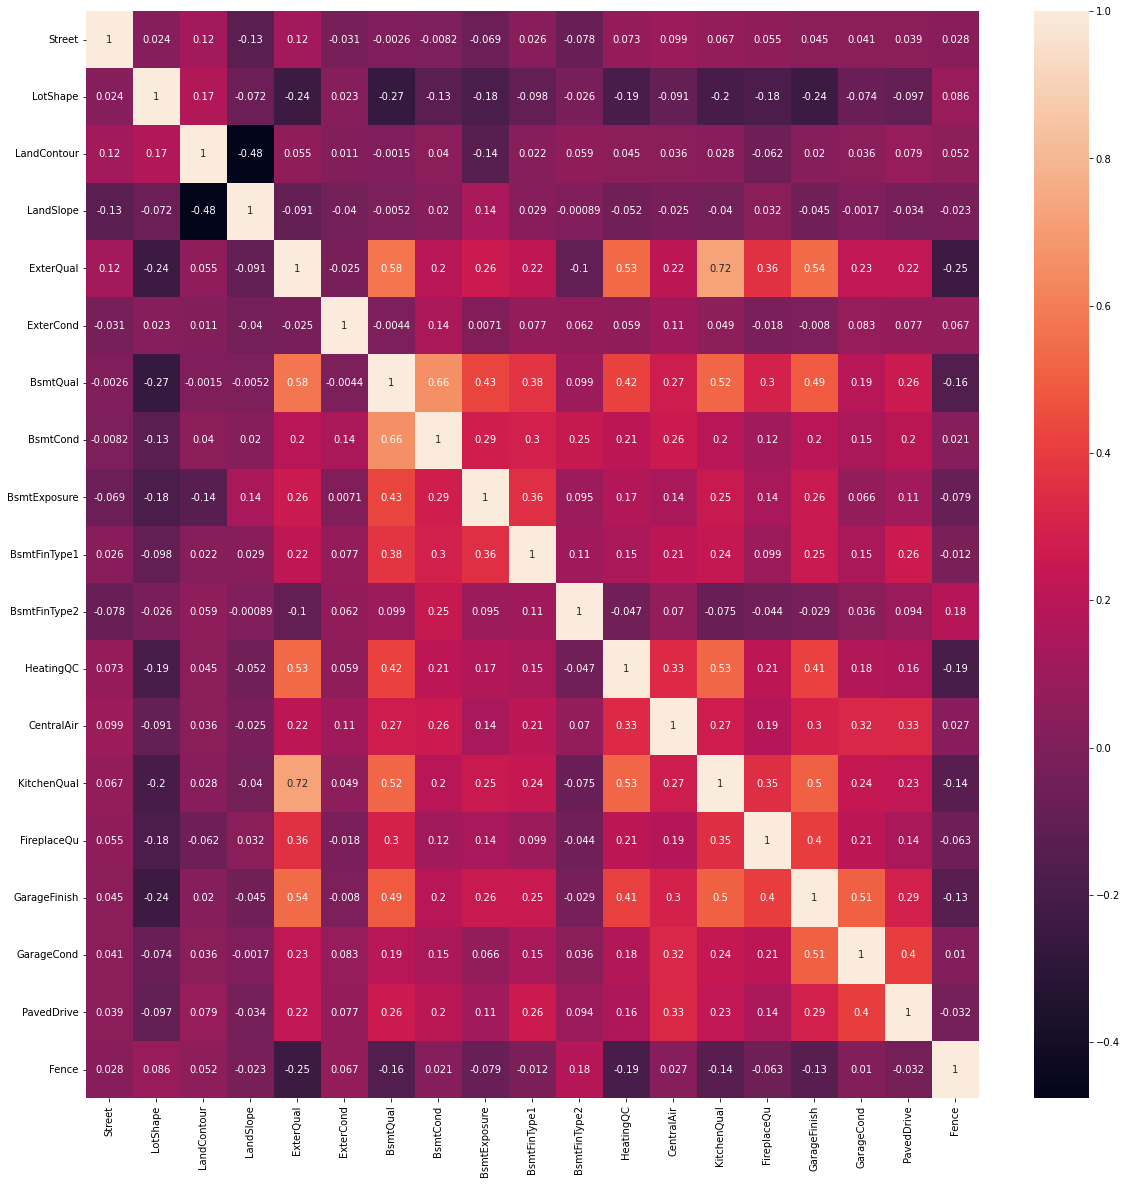

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df[ord_cols].corr(),annot=True)

### Data splitting to test and training 

In [47]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)

### Rescaling features

In [48]:
scaler = MinMaxScaler()

df_train[num_cols+ord_cols] = scaler.fit_transform(df_train[num_cols+ord_cols])
df_train.head()

LotFrontage   LotArea  Street  LotShape  LandContour  LandSlope  \
350      0.160959  0.247438     1.0  0.666667          1.0        0.0   
1350     0.239726  0.392524     1.0  1.000000          1.0        0.0   
1194     0.202055  0.306034     1.0  1.000000          1.0        0.0   
278      0.294521  0.499051     1.0  1.000000          1.0        0.0   
642      0.184932  0.476660     1.0  1.000000          1.0        0.0   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
350      0.888889     0.428571   0.978261      0.950000  ...               0   
1350     0.444444     0.428571   0.702899      0.316667  ...               0   
1194     0.555556     0.714286   0.702899      0.316667  ...               0   
278      0.888889     0.428571   0.971014      0.950000  ...               0   
642      0.777778     0.714286   0.724638      0.750000  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
350                0             1             0            0   
1350               0             0             0            1   
1194               0             0             0            1   
278                0             1             0            0   
642                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
350                       0                     0                     0   
1350                      0                     0                     0   
1194                      0                     0                     0   
278                       0                     0                     0   
642                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
350                      0                      1  
1350                     1                      0  
1194                     1                      0  
278                      0                      1  
642                      1                      0  

[5 rows x 192 columns]

In [49]:
df_test[num_cols+ord_cols] = scaler.transform(df_test[num_cols+ord_cols])

# Feature selection

### RFE
Let us use use RFE to cut down the number of columns to 30.
We shall perform RFE over simple linear regression, since we do not know the optimal regularization constants for lasso and ridge yet.

In [50]:
X_train = df_train.drop(['SalePrice'],axis=1)
y_train = df_train.SalePrice
X_test = df_test.drop(['SalePrice'],axis=1)
y_test = df_test.SalePrice

In [51]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(X_train,y_train)

In [52]:
col = list(X_train.columns[rfe.support_])

In [53]:
X_train = df_train[col]
X_test = df_test[col]

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by = 'VIF',ascending=False)
print(vif)

                 Features    VIF
2             OverallQual  48.21
1                  Street  45.31
20    Exterior1st_CemntBd  36.04
22    Exterior2nd_CmentBd  35.99
4               YearBuilt  26.80
7                1stFlrSF  19.55
3             OverallCond  15.54
9             KitchenQual  13.52
10             GarageArea  10.25
6               BsmtUnfSF   9.79
11          MSSubClass_75   9.16
0                 LotArea   9.06
5              BsmtFinSF1   6.62
19      HouseStyle_2.5Unf   5.14
18      HouseStyle_2.5Fin   5.01
8                2ndFlrSF   2.89
29  SaleCondition_Partial   1.56
14   Neighborhood_NridgHt   1.45
17         BldgType_Twnhs   1.36
25           Heating_OthW   1.20
12   Neighborhood_Crawfor   1.19
15   Neighborhood_StoneBr   1.18
13   Neighborhood_NoRidge   1.16
21    Exterior2nd_Brk Cmn   1.07
16        Condition1_RRNn   1.05
23      Exterior2nd_Stone   1.04
26       Electrical_FuseP   1.03
28   SaleCondition_Family   1.03
24        Foundation_Wood   1.02
27        

<AxesSubplot:>

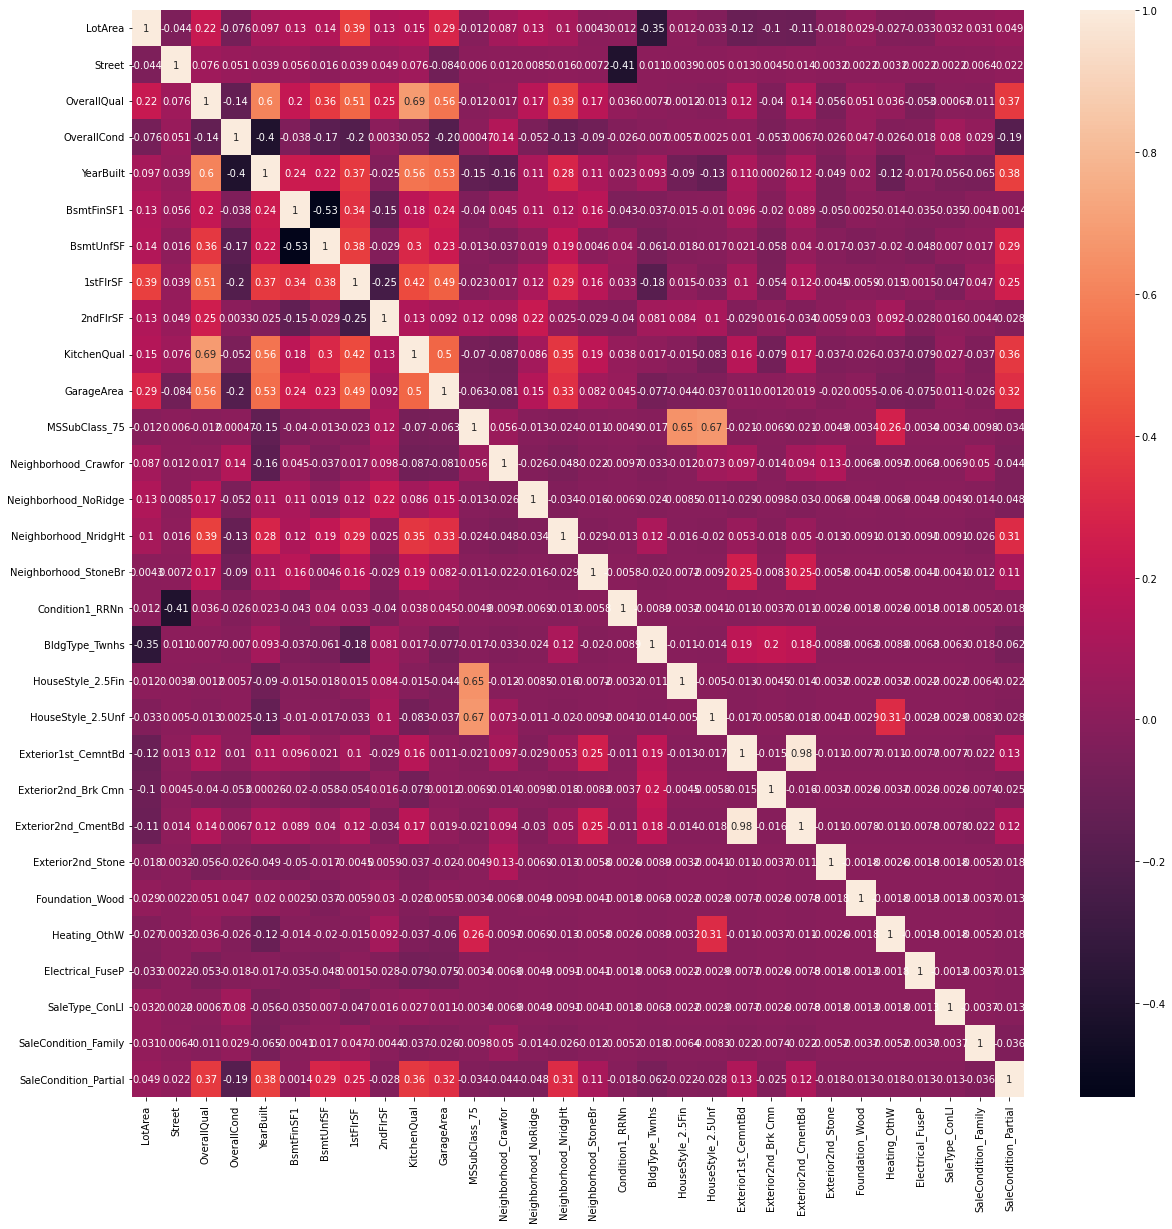

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[col].corr(),annot=True)

We see the following high correlation pairs:
1. Exterior2nd_CmentBd - Exterior1st_CmentBd (0.98)

We shall remove Exterior2nd_CmentBd

In [56]:
# All utilities seem to have only one value: AllPub. hence we see we can remove Utilites
for i in ['Exterior2nd_CmentBd']:
    col.remove(i)
X_train = df_train[col]
X_test = df_test[col]

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by = 'VIF',ascending=False)
print(vif)

                 Features    VIF
2             OverallQual  48.15
1                  Street  45.18
4               YearBuilt  26.79
7                1stFlrSF  19.53
3             OverallCond  15.53
9             KitchenQual  13.49
10             GarageArea  10.25
6               BsmtUnfSF   9.78
11          MSSubClass_75   9.16
0                 LotArea   9.06
5              BsmtFinSF1   6.62
19      HouseStyle_2.5Unf   5.14
18      HouseStyle_2.5Fin   5.01
8                2ndFlrSF   2.89
28  SaleCondition_Partial   1.55
14   Neighborhood_NridgHt   1.45
17         BldgType_Twnhs   1.36
20    Exterior1st_CemntBd   1.24
24           Heating_OthW   1.20
12   Neighborhood_Crawfor   1.19
15   Neighborhood_StoneBr   1.18
13   Neighborhood_NoRidge   1.16
21    Exterior2nd_Brk Cmn   1.07
16        Condition1_RRNn   1.05
22      Exterior2nd_Stone   1.04
25       Electrical_FuseP   1.03
27   SaleCondition_Family   1.03
23        Foundation_Wood   1.02
26         SaleType_ConLI   1.02


# Model Building

## 1. Simple Linear Regression: Baseline

In [58]:
lm = LinearRegression()
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.892357917249122
0.8740158059391069


### RESIDUE ANALYSIS

#### EVALUATION ON TRAINING SET

In [59]:
res = y_train-y_train_pred

C:\Users\vssashar\AppData\Local\Temp\ipykernel_5752\4287726284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 0, 'residue')

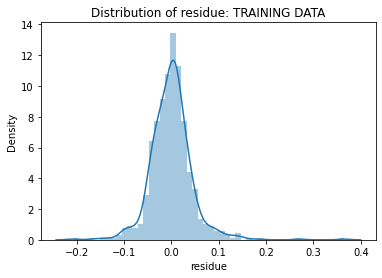

In [60]:
sns.distplot(res)
plt.title('Distribution of residue: TRAINING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TRAINING DATA')

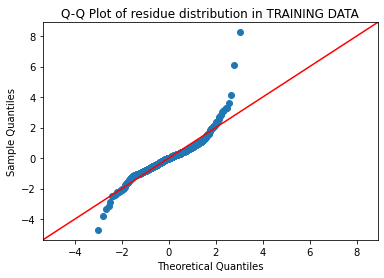

In [61]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TRAINING DATA')

Text(0.5, 1.0, 'Y vs residue: TRAINING DATA')

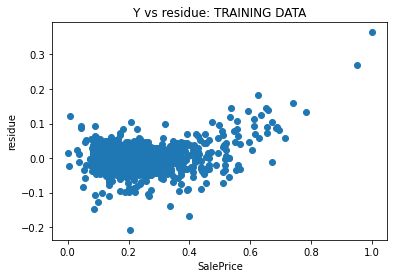

In [62]:
plt.scatter(y_train,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TRAINING DATA')

#### EVALUATION ON TEST SET

C:\Users\vssashar\AppData\Local\Temp\ipykernel_5752\1015940491.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res);


Text(0.5, 0, 'residue')

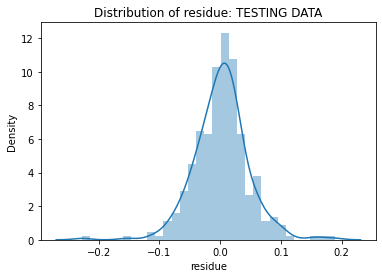

In [63]:
res = y_test-y_test_pred
sns.distplot(res);
plt.title('Distribution of residue: TESTING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TESTING DATA')

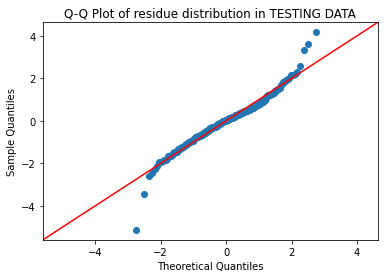

In [64]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TESTING DATA')

Text(0.5, 1.0, 'Y vs residue: TESTING DATA')

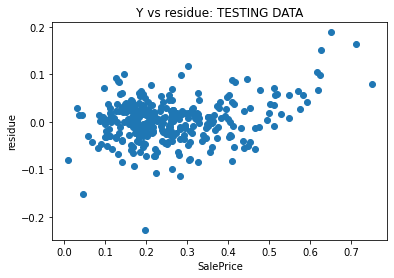

In [65]:
plt.scatter(y_test,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TESTING DATA')

In [66]:
print("R-squared for training = ",r2_score(y_train,y_train_pred))
print("R-squared for testing = ",r2_score(y_test,y_test_pred))

R-squared for training =  0.892357917249122
R-squared for testing =  0.8740158059391069


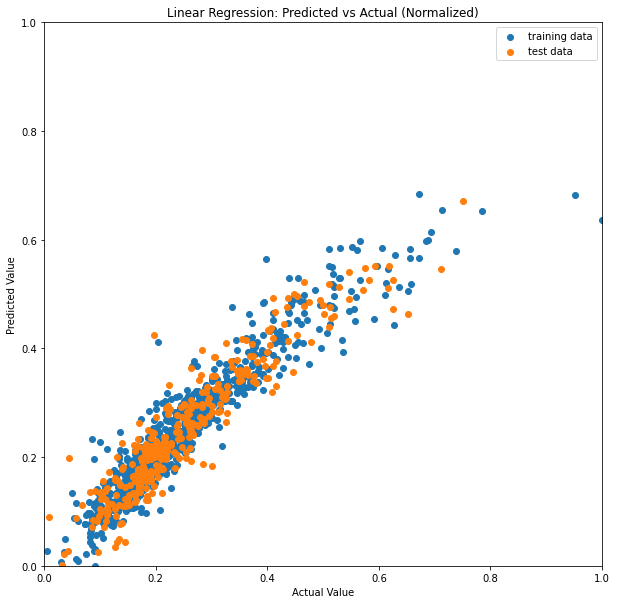

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(y_train,y_train_pred,label = 'training data')
plt.scatter(y_test,y_test_pred,label = 'test data')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Linear Regression: Predicted vs Actual (Normalized)')
plt.legend()

## 2. LASSO

In [68]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8676851891767677
0.8652858558535395


In [69]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[1e-6,1e-5,1e-4, 1e-3, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.005733      0.001790         0.001417        0.000523     0.000001   
1       0.003614      0.000843         0.000926        0.000550     0.000010   
2       0.003264      0.000775         0.001622        0.000530     0.000100   
3       0.002993      0.000651         0.001103        0.000332     0.001000   
4       0.002651      0.000629         0.001231        0.000610     0.010000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}          -0.033214          -0.026837          -0.039984   
1   {'alpha': 1e-05}          -0.033118          -0.026722          -0.040039   
2  {'alpha': 0.0001}          -0.033336          -0.026097          -0.040073   
3   {'alpha': 0.001}          -0.033073          -0.029294          -0.041364   
4    {'alpha': 0.01}          -0.055717          -0.073790          -0.063663   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.035941  ...           -0.029417           -0.029597   
1          -0.036142  ...           -0.029477           -0.029655   
2          -0.036885  ...           -0.030021           -0.030210   
3          -0.042759  ...           -0.032680           -0.032876   
4          -0.082586  ...           -0.068419           -0.068124   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.030896           -0.030510           -0.030661   
1           -0.030928           -0.030561           -0.030732   
2           -0.031381           -0.031179           -0.031141   
3           -0.033594           -0.033166           -0.033527   
4           -0.068267           -0.068373           -0.068031   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.029928           -0.029998           -0.031279   
1           -0.029967           -0.030040           -0.031324   
2           -0.030446           -0.030520           -0.031849   
3           -0.033075           -0.032886           -0.034324   
4           -0.067899           -0.067212           -0.067794   

   mean_train_score  std_train_score  
0         -0.030385         0.000589  
1         -0.030435         0.000586  
2         -0.030947         0.000578  
3         -0.033387         0.000515  
4         -0.068143         0.000456  

[5 rows x 31 columns]

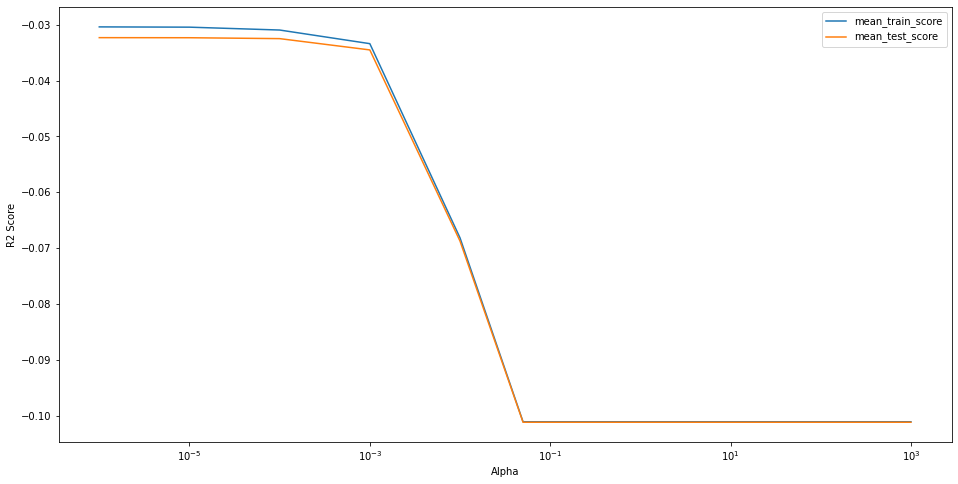

In [71]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'],label = 'mean_train_score')
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'],label = 'mean_test_score')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [72]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1e-06}

In [73]:
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8923571291216799
0.8744220531193507


In [74]:
model_param = list(lasso.coef_)
model_param.append(lasso.intercept_)
cols = list(X_train.columns)
cols.append('constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [75]:
lasso_coef.sort_values(by='Coef',ascending=False).head(60)

Featuere      Coef
2             OverallQual  0.197478
7                1stFlrSF  0.162071
8                2ndFlrSF  0.132110
5              BsmtFinSF1  0.105891
0                 LotArea  0.096079
11          MSSubClass_75  0.093540
16        Condition1_RRNn  0.089604
4               YearBuilt  0.088783
14   Neighborhood_NridgHt  0.071826
9             KitchenQual  0.065570
15   Neighborhood_StoneBr  0.064434
13   Neighborhood_NoRidge  0.063131
3             OverallCond  0.060773
6               BsmtUnfSF  0.058753
10             GarageArea  0.054715
1                  Street  0.053239
21    Exterior2nd_Brk Cmn  0.049019
28  SaleCondition_Partial  0.045105
12   Neighborhood_Crawfor  0.042937
20    Exterior1st_CemntBd  0.038583
25       Electrical_FuseP  0.036328
22      Exterior2nd_Stone  0.027654
17         BldgType_Twnhs -0.048093
24           Heating_OthW -0.049650
27   SaleCondition_Family -0.054422
26         SaleType_ConLI -0.068272
23        Foundation_Wood -0.087183
19      HouseStyle_2.5Unf -0.110737
18      HouseStyle_2.5Fin -0.114296
29               constant -0.238835

### RESIDUE ANALYSIS

#### EVALUATION ON TRAINING SET

In [76]:
res = y_train-y_train_pred

C:\Users\vssashar\AppData\Local\Temp\ipykernel_5752\4287726284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 0, 'residue')

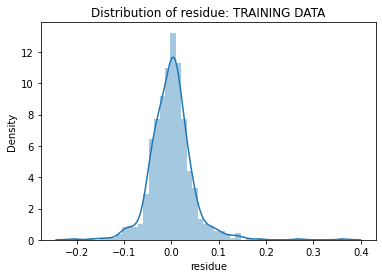

In [77]:
sns.distplot(res)
plt.title('Distribution of residue: TRAINING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TRAINING DATA')

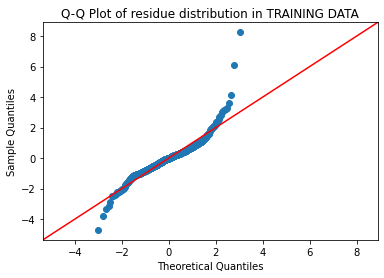

In [78]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TRAINING DATA')

Text(0.5, 1.0, 'Y vs residue: TRAINING DATA')

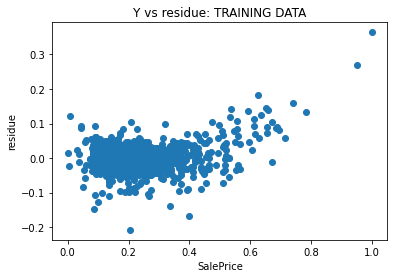

In [79]:
plt.scatter(y_train,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TRAINING DATA')

#### EVALUATION ON TEST SET

C:\Users\vssashar\AppData\Local\Temp\ipykernel_5752\1015940491.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res);


Text(0.5, 0, 'residue')

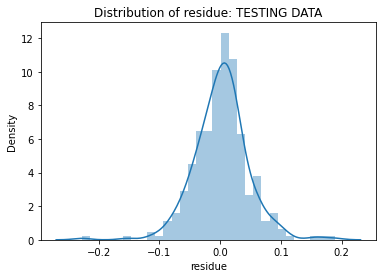

In [80]:
res = y_test-y_test_pred
sns.distplot(res);
plt.title('Distribution of residue: TESTING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TESTING DATA')

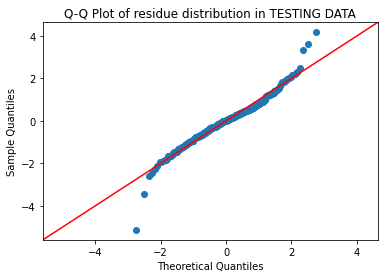

In [81]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TESTING DATA')

Text(0.5, 1.0, 'Y vs residue: TESTING DATA')

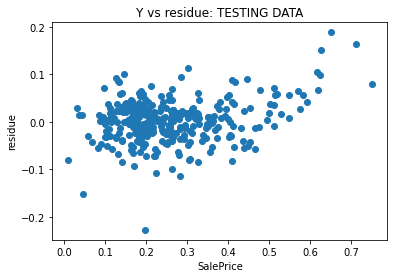

In [82]:
plt.scatter(y_test,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TESTING DATA')

In [83]:
print("R-squared for training = ",r2_score(y_train,y_train_pred))
print("R-squared for testing = ",r2_score(y_test,y_test_pred))

R-squared for training =  0.8923571291216799
R-squared for testing =  0.8744220531193507


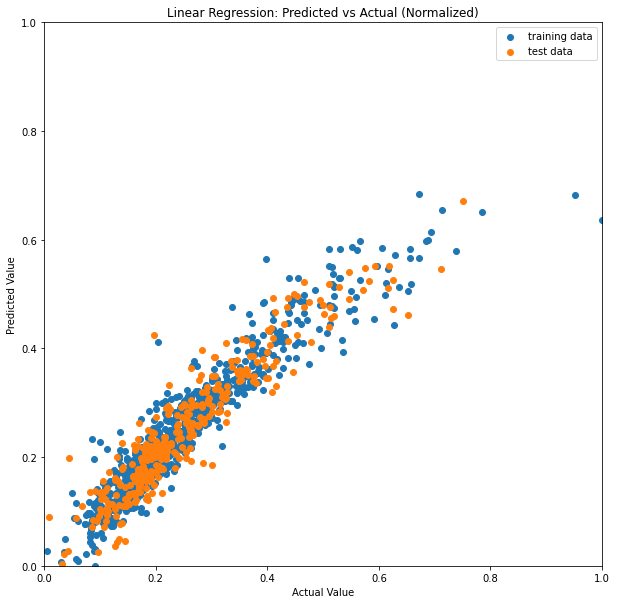

In [84]:
plt.figure(figsize=(10,10))
plt.scatter(y_train,y_train_pred,label = 'training data')
plt.scatter(y_test,y_test_pred,label = 'test data')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Linear Regression: Predicted vs Actual (Normalized)')
plt.legend()

## 3. Ridge

In [85]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.892357905532156
0.8740622605639738


In [86]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.003100      0.000945         0.001900        0.000700       0.0001   
1       0.002700      0.000781         0.001500        0.000500       0.0010   
2       0.003199      0.001076         0.001601        0.000663       0.0100   
3       0.002200      0.000400         0.001500        0.000671       0.0500   
4       0.002401      0.000664         0.001102        0.000299       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.033224          -0.026851          -0.039978   
1   {'alpha': 0.001}          -0.033223          -0.026850          -0.039978   
2    {'alpha': 0.01}          -0.033211          -0.026838          -0.039983   
3    {'alpha': 0.05}          -0.033156          -0.026788          -0.040000   
4     {'alpha': 0.1}          -0.033093          -0.026749          -0.040011   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.035918  ...           -0.029411           -0.029592   
1          -0.035920  ...           -0.029412           -0.029592   
2          -0.035938  ...           -0.029416           -0.029596   
3          -0.036005  ...           -0.029436           -0.029617   
4          -0.036072  ...           -0.029455           -0.029638   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.030892           -0.030504           -0.030655   
1           -0.030892           -0.030505           -0.030655   
2           -0.030893           -0.030510           -0.030660   
3           -0.030899           -0.030528           -0.030686   
4           -0.030906           -0.030548           -0.030713   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.029924           -0.029993           -0.031275   
1           -0.029924           -0.029993           -0.031275   
2           -0.029928           -0.029997           -0.031279   
3           -0.029944           -0.030011           -0.031296   
4           -0.029959           -0.030023           -0.031311   

   mean_train_score  std_train_score  
0         -0.030380         0.000589  
1         -0.030381         0.000589  
2         -0.030385         0.000589  
3         -0.030402         0.000587  
4         -0.030419         0.000586  

[5 rows x 31 columns]

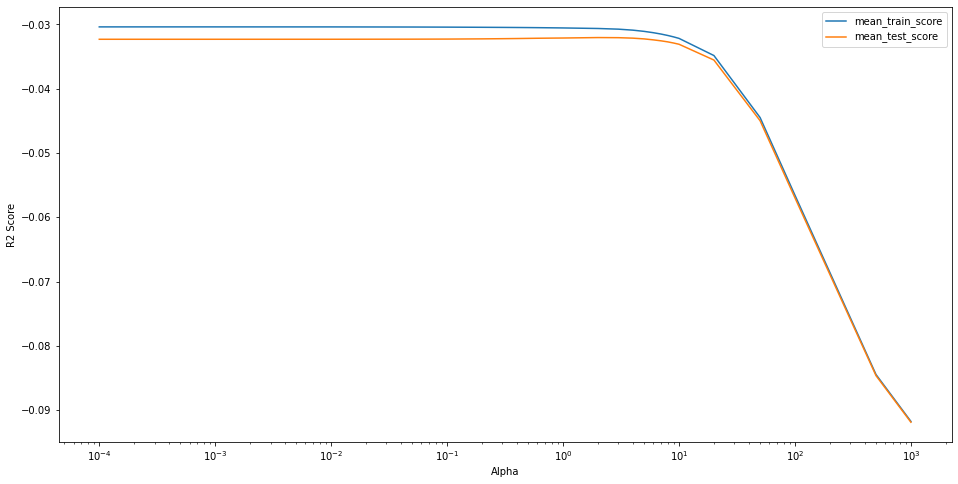

In [88]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'],label = 'mean_train_score')
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'],label = 'mean_test_score')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [89]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 2.0}

In [90]:
ridge = Ridge(alpha = model_cv.best_params_['alpha'])
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8897302013515009
0.8820836858709308


In [91]:
model_parameter = list(ridge.coef_)
model_parameter.append(ridge.intercept_)
cols = list(X_train.columns)
cols.append('constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [92]:
ridge_coef.sort_values(by='Coef',ascending=False).head(60)

Feature      Coef
2             OverallQual  0.171786
7                1stFlrSF  0.153709
8                2ndFlrSF  0.126616
5              BsmtFinSF1  0.103587
4               YearBuilt  0.089369
0                 LotArea  0.089185
9             KitchenQual  0.077878
14   Neighborhood_NridgHt  0.071122
13   Neighborhood_NoRidge  0.061098
10             GarageArea  0.060268
6               BsmtUnfSF  0.058479
15   Neighborhood_StoneBr  0.055885
3             OverallCond  0.048596
12   Neighborhood_Crawfor  0.045470
28  SaleCondition_Partial  0.045408
20    Exterior1st_CemntBd  0.037477
16        Condition1_RRNn  0.037339
21    Exterior2nd_Brk Cmn  0.029862
1                  Street  0.025199
25       Electrical_FuseP  0.011996
22      Exterior2nd_Stone  0.011643
11          MSSubClass_75  0.000692
18      HouseStyle_2.5Fin -0.010484
24           Heating_OthW -0.018970
26         SaleType_ConLI -0.022636
23        Foundation_Wood -0.025342
19      HouseStyle_2.5Unf -0.028078
27   SaleCondition_Family -0.041796
17         BldgType_Twnhs -0.044661
29               constant -0.191339

### RESIDUE ANALYSIS

#### EVALUATION ON TRAINING SET

In [93]:
res = y_train-y_train_pred

C:\Users\vssashar\AppData\Local\Temp\ipykernel_5752\4287726284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 0, 'residue')

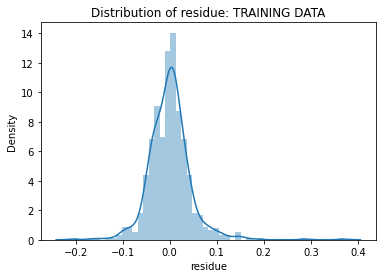

In [94]:
sns.distplot(res)
plt.title('Distribution of residue: TRAINING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TRAINING DATA')

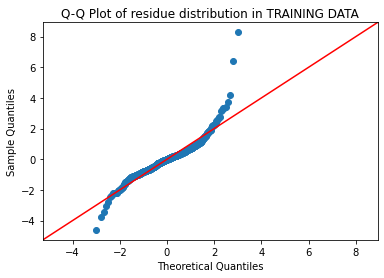

In [95]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TRAINING DATA')

Text(0.5, 1.0, 'Y vs residue: TRAINING DATA')

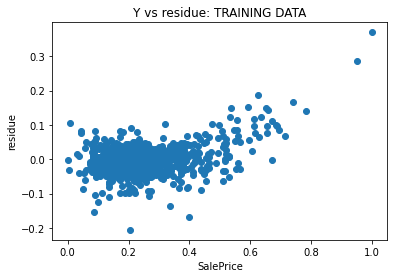

In [96]:
plt.scatter(y_train,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TRAINING DATA')

#### EVALUATION ON TEST SET

C:\Users\vssashar\AppData\Local\Temp\ipykernel_5752\1015940491.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res);


Text(0.5, 0, 'residue')

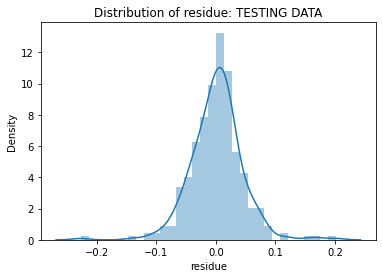

In [97]:
res = y_test-y_test_pred
sns.distplot(res);
plt.title('Distribution of residue: TESTING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TESTING DATA')

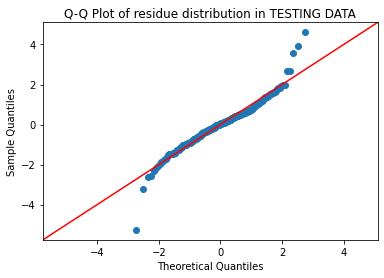

In [98]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TESTING DATA')

Text(0.5, 1.0, 'Y vs residue: TESTING DATA')

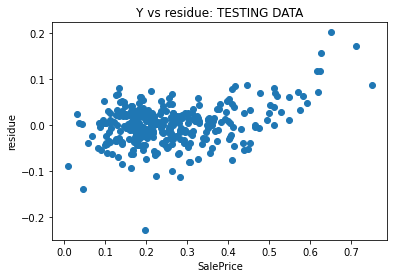

In [99]:
plt.scatter(y_test,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TESTING DATA')

In [100]:
print("R-squared for training = ",r2_score(y_train,y_train_pred))
print("R-squared for testing = ",r2_score(y_test,y_test_pred))

R-squared for training =  0.8897302013515009
R-squared for testing =  0.8820836858709308


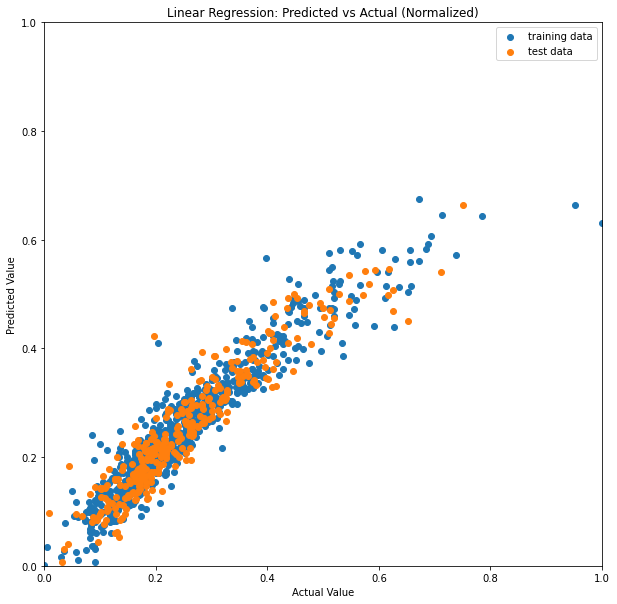

In [101]:
plt.figure(figsize=(10,10))
plt.scatter(y_train,y_train_pred,label = 'training data')
plt.scatter(y_test,y_test_pred,label = 'test data')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Linear Regression: Predicted vs Actual (Normalized)')
plt.legend()

## FINAL MODEL

In [102]:
ridge = Ridge(alpha = 2)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8897302013515009
0.8820836858709308


In [103]:
model_parameter = list(ridge.coef_)
model_parameter.append(ridge.intercept_)
cols = list(X_train.columns)
cols.append('constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [104]:
ridge_coef.sort_values(by='Coef',ascending=False).head(60)

Feature      Coef
2             OverallQual  0.171786
7                1stFlrSF  0.153709
8                2ndFlrSF  0.126616
5              BsmtFinSF1  0.103587
4               YearBuilt  0.089369
0                 LotArea  0.089185
9             KitchenQual  0.077878
14   Neighborhood_NridgHt  0.071122
13   Neighborhood_NoRidge  0.061098
10             GarageArea  0.060268
6               BsmtUnfSF  0.058479
15   Neighborhood_StoneBr  0.055885
3             OverallCond  0.048596
12   Neighborhood_Crawfor  0.045470
28  SaleCondition_Partial  0.045408
20    Exterior1st_CemntBd  0.037477
16        Condition1_RRNn  0.037339
21    Exterior2nd_Brk Cmn  0.029862
1                  Street  0.025199
25       Electrical_FuseP  0.011996
22      Exterior2nd_Stone  0.011643
11          MSSubClass_75  0.000692
18      HouseStyle_2.5Fin -0.010484
24           Heating_OthW -0.018970
26         SaleType_ConLI -0.022636
23        Foundation_Wood -0.025342
19      HouseStyle_2.5Unf -0.028078
27   SaleCondition_Family -0.041796
17         BldgType_Twnhs -0.044661
29               constant -0.191339

### RFE

In [105]:
X_train = df_train.drop(['SalePrice','OverallQual','1stFlrSF','2ndFlrSF','BsmtFinSF1','YearBuilt'],axis=1)
y_train = df_train.SalePrice
X_test = df_test.drop(['SalePrice','OverallQual','1stFlrSF','2ndFlrSF','BsmtFinSF1','YearBuilt'],axis=1)
y_test = df_test.SalePrice

In [106]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=40)
rfe = rfe.fit(X_train,y_train)

In [107]:
col = list(X_train.columns[rfe.support_])

In [108]:
X_train = df_train[col]
X_test = df_test[col]

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by = 'VIF',ascending=False)
print(vif)

C:\Users\vssashar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                Features     VIF
27       BldgType_Duplex     inf
33    Exterior1st_CBlock     inf
17         MSSubClass_90     inf
36    Exterior2nd_CBlock     inf
25       Condition2_Norm  275.97
8          MSSubClass_20  117.12
12         MSSubClass_60   57.49
11         MSSubClass_50   35.20
37   Exterior2nd_CmentBd   34.27
34   Exterior1st_CemntBd   34.26
29       BldgType_TwnhsE   24.22
9          MSSubClass_30   18.58
13         MSSubClass_70   14.58
6             GarageCond   14.36
39         GarageType_NA   13.84
15         MSSubClass_80   10.58
28        BldgType_Twnhs   10.40
7         MSSubClass_190    6.60
16         MSSubClass_85    6.35
14         MSSubClass_75    4.42
2              GrLivArea    3.69
30     HouseStyle_1.5Unf    3.59
5             GarageArea    2.78
0              ExterQual    2.77
4            KitchenQual    2.46
10         MSSubClass_40    2.44
3           BedroomAbvGr    2.07
31     HouseStyle_2.5Fin    1.98
24      Condition2_Feedr    1.96
19        

<AxesSubplot:>

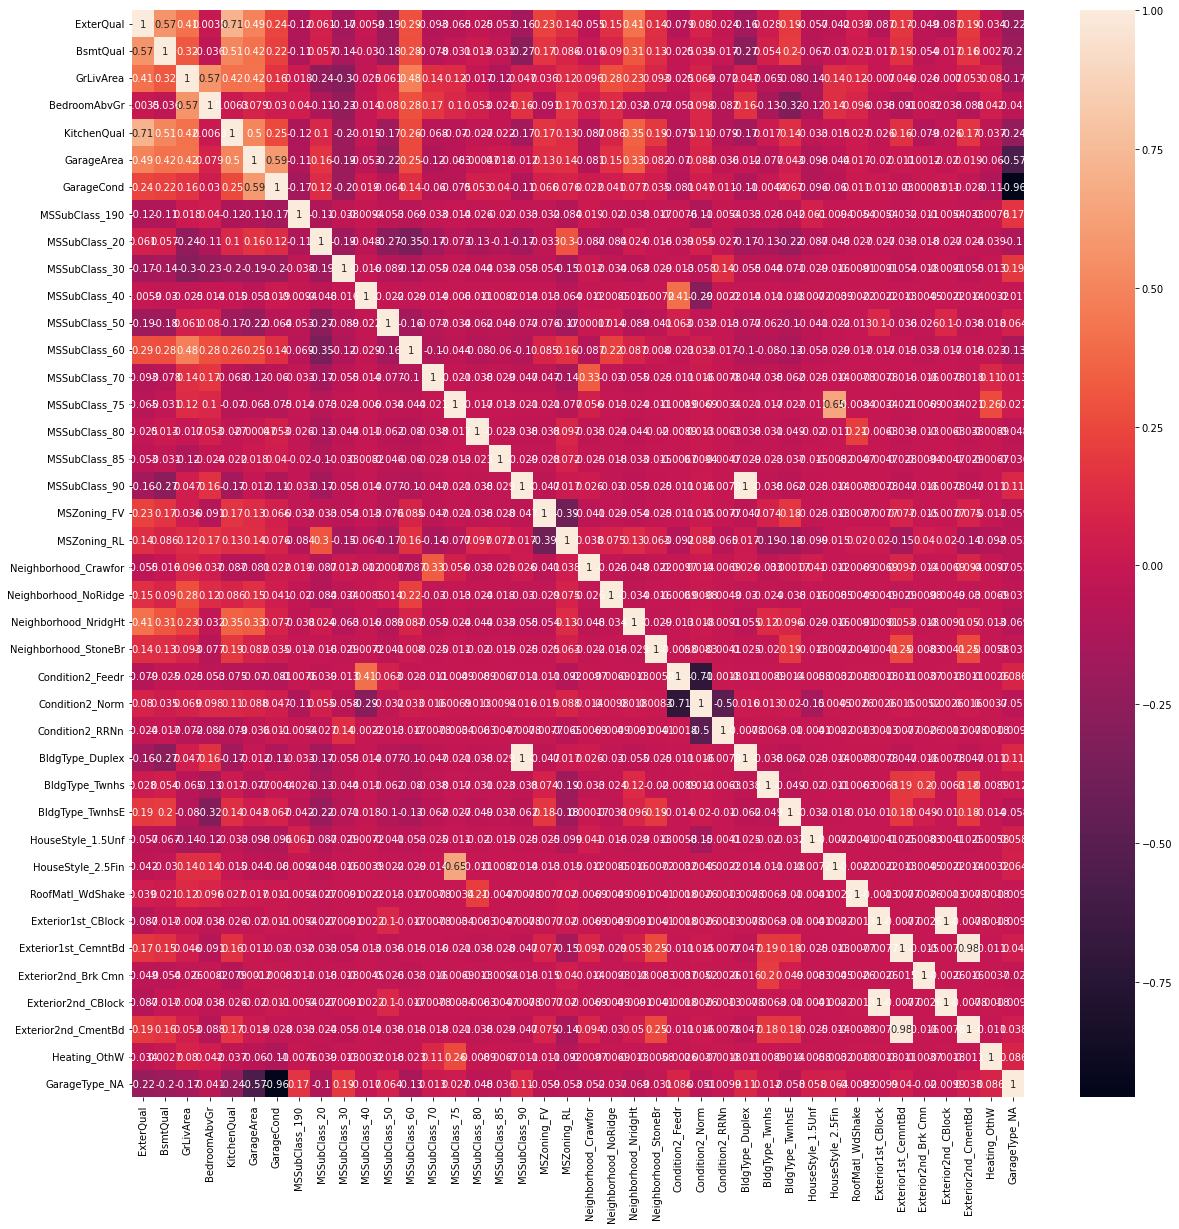

In [110]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[col].corr(),annot=True)

In [111]:
# Create correlation matrix
corr_matrix = X_train[col].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features 
X_train = X_train[col].drop(to_drop, axis=1)

In [112]:
X_test = X_test[X_train.columns]

<AxesSubplot:>

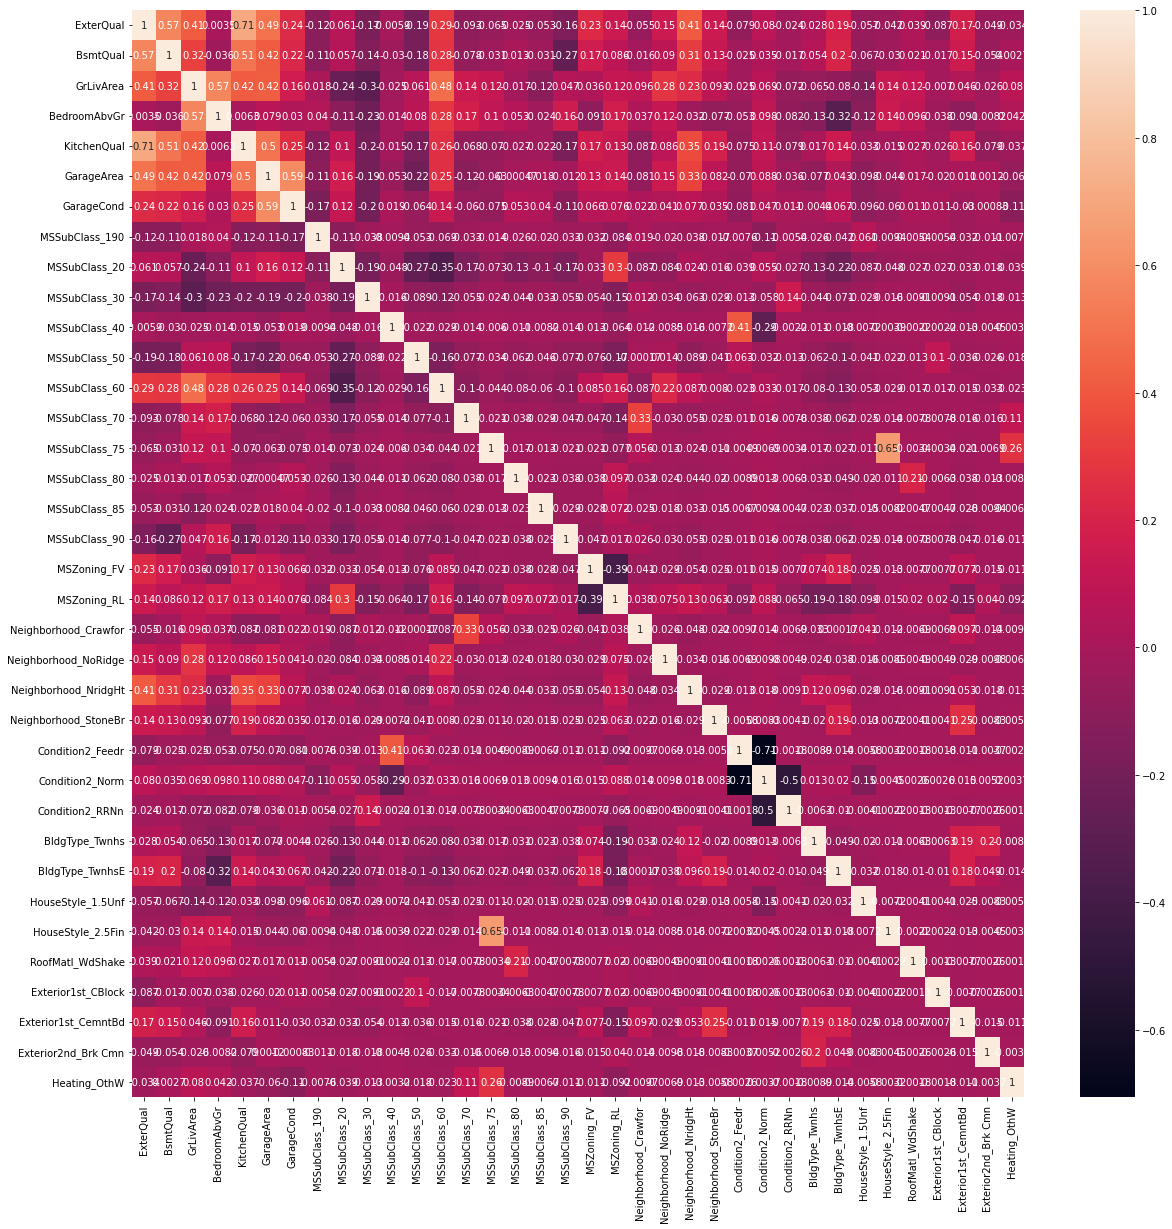

In [113]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True)

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by = 'VIF',ascending=False)
print(vif)

                Features     VIF
25       Condition2_Norm  235.39
8          MSSubClass_20   97.47
12         MSSubClass_60   48.14
11         MSSubClass_50   29.35
28       BldgType_TwnhsE   20.29
9          MSSubClass_30   15.55
13         MSSubClass_70   12.61
17         MSSubClass_90   12.42
15         MSSubClass_80    9.00
27        BldgType_Twnhs    8.77
16         MSSubClass_85    5.45
7         MSSubClass_190    5.38
14         MSSubClass_75    4.29
2              GrLivArea    3.69
29     HouseStyle_1.5Unf    3.12
5             GarageArea    2.76
0              ExterQual    2.74
4            KitchenQual    2.46
10         MSSubClass_40    2.25
3           BedroomAbvGr    2.06
19           MSZoning_RL    1.94
30     HouseStyle_2.5Fin    1.93
6             GarageCond    1.85
24      Condition2_Feedr    1.84
1               BsmtQual    1.80
18           MSZoning_FV    1.46
22  Neighborhood_NridgHt    1.44
26       Condition2_RRNn    1.34
20  Neighborhood_Crawfor    1.29
33   Exter

### Lasso

In [115]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[1e-6,1e-5,1e-4, 1e-3, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\vssashar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e-01, tolerance: 1.297e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\vssashar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e-01, tolerance: 1.241e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\vssashar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalC

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.058143      0.019824         0.002106        0.000830     0.000001   
1       0.013794      0.007576         0.001308        0.000457     0.000010   
2       0.004595      0.001430         0.001611        0.000496     0.000100   
3       0.003311      0.001050         0.001532        0.000645     0.001000   
4       0.003271      0.000869         0.001727        0.000614     0.010000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}          -0.033232          -0.038814          -0.039857   
1   {'alpha': 1e-05}          -0.033249          -0.038798          -0.039788   
2  {'alpha': 0.0001}          -0.033349          -0.038526          -0.039087   
3   {'alpha': 0.001}          -0.034811          -0.037091          -0.040617   
4    {'alpha': 0.01}          -0.055225          -0.071789          -0.064119   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.044975  ...           -0.036188           -0.035516   
1          -0.045126  ...           -0.036225           -0.035562   
2          -0.046211  ...           -0.036546           -0.035818   
3          -0.050520  ...           -0.038767           -0.037786   
4          -0.083865  ...           -0.068827           -0.068632   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.036653           -0.036517           -0.036184   
1           -0.036706           -0.036561           -0.036211   
2           -0.036996           -0.036913           -0.036512   
3           -0.038774           -0.038700           -0.038542   
4           -0.068770           -0.068716           -0.069260   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.036130           -0.035758           -0.036547   
1           -0.036153           -0.035785           -0.036569   
2           -0.036505           -0.036043           -0.036912   
3           -0.038281           -0.037711           -0.038719   
4           -0.069427           -0.067469           -0.069359   

   mean_train_score  std_train_score  
0         -0.036276         0.000406  
1         -0.036310         0.000408  
2         -0.036613         0.000427  
3         -0.038504         0.000428  
4         -0.068934         0.000581  

[5 rows x 31 columns]

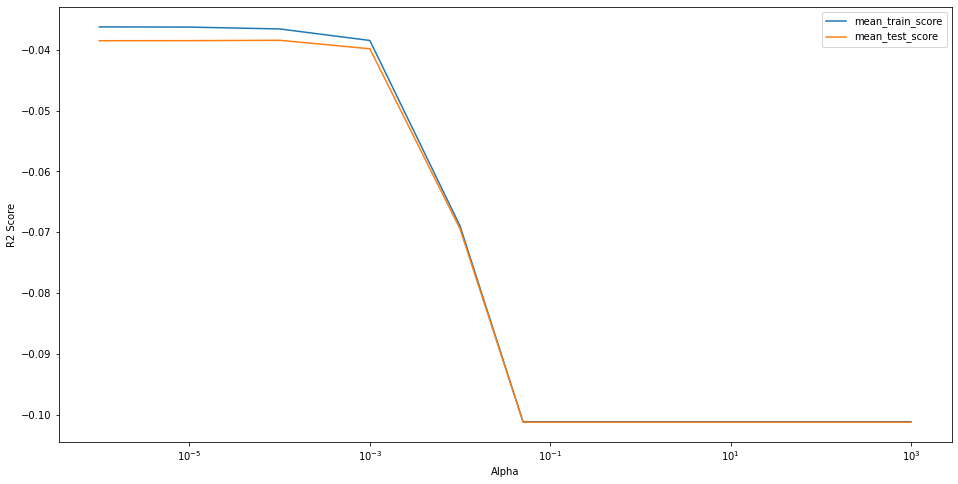

In [117]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'],label = 'mean_train_score')
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'],label = 'mean_test_score')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [118]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [119]:
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8574128047960761
0.8521874181894856


In [120]:
model_param = list(lasso.coef_)
model_param.append(lasso.intercept_)
cols = list(X_train.columns)
cols.append('constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [121]:
lasso_coef

Featuere      Coef
0              ExterQual  0.090832
1               BsmtQual  0.112784
2              GrLivArea  0.369128
3           BedroomAbvGr -0.074834
4            KitchenQual  0.086842
5             GarageArea  0.104611
6             GarageCond -0.001289
7         MSSubClass_190 -0.011667
8          MSSubClass_20  0.038873
9          MSSubClass_30  0.008024
10         MSSubClass_40 -0.000000
11         MSSubClass_50 -0.002207
12         MSSubClass_60  0.022971
13         MSSubClass_70 -0.000000
14         MSSubClass_75 -0.038092
15         MSSubClass_80  0.033662
16         MSSubClass_85  0.031114
17         MSSubClass_90  0.000000
18           MSZoning_FV  0.038803
19           MSZoning_RL  0.021172
20  Neighborhood_Crawfor  0.059434
21  Neighborhood_NoRidge  0.063981
22  Neighborhood_NridgHt  0.088833
23  Neighborhood_StoneBr  0.091562
24      Condition2_Feedr -0.000000
25       Condition2_Norm -0.000000
26       Condition2_RRNn  0.000000
27        BldgType_Twnhs -0.053191
28       BldgType_TwnhsE -0.005540
29     HouseStyle_1.5Unf  0.012627
30     HouseStyle_2.5Fin -0.000000
31      RoofMatl_WdShake -0.023807
32    Exterior1st_CBlock -0.000000
33   Exterior1st_CemntBd  0.044676
34   Exterior2nd_Brk Cmn  0.016891
35          Heating_OthW -0.024110
36              constant -0.100464

In [122]:
lasso_coef.sort_values(by='Coef',ascending=False).head(60)

Featuere      Coef
2              GrLivArea  0.369128
1               BsmtQual  0.112784
5             GarageArea  0.104611
23  Neighborhood_StoneBr  0.091562
0              ExterQual  0.090832
22  Neighborhood_NridgHt  0.088833
4            KitchenQual  0.086842
21  Neighborhood_NoRidge  0.063981
20  Neighborhood_Crawfor  0.059434
33   Exterior1st_CemntBd  0.044676
8          MSSubClass_20  0.038873
18           MSZoning_FV  0.038803
15         MSSubClass_80  0.033662
16         MSSubClass_85  0.031114
12         MSSubClass_60  0.022971
19           MSZoning_RL  0.021172
34   Exterior2nd_Brk Cmn  0.016891
29     HouseStyle_1.5Unf  0.012627
9          MSSubClass_30  0.008024
13         MSSubClass_70 -0.000000
32    Exterior1st_CBlock -0.000000
30     HouseStyle_2.5Fin -0.000000
26       Condition2_RRNn  0.000000
25       Condition2_Norm -0.000000
24      Condition2_Feedr -0.000000
10         MSSubClass_40 -0.000000
17         MSSubClass_90  0.000000
6             GarageCond -0.001289
11         MSSubClass_50 -0.002207
28       BldgType_TwnhsE -0.005540
7         MSSubClass_190 -0.011667
31      RoofMatl_WdShake -0.023807
35          Heating_OthW -0.024110
14         MSSubClass_75 -0.038092
27        BldgType_Twnhs -0.053191
3           BedroomAbvGr -0.074834
36              constant -0.100464

### Ridge

In [123]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.003413      0.000645         0.001515        0.000520       0.0001   
1       0.002890      0.000562         0.001613        0.000600       0.0010   
2       0.003410      0.000651         0.001836        0.000601       0.0100   
3       0.002597      0.000629         0.001998        0.001208       0.0500   
4       0.003412      0.000807         0.001709        0.000442       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.033230          -0.038815          -0.039865   
1   {'alpha': 0.001}          -0.033231          -0.038815          -0.039864   
2    {'alpha': 0.01}          -0.033232          -0.038815          -0.039857   
3    {'alpha': 0.05}          -0.033235          -0.038812          -0.039828   
4     {'alpha': 0.1}          -0.033239          -0.038807          -0.039792   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.044959  ...           -0.036184           -0.035511   
1          -0.044961  ...           -0.036184           -0.035511   
2          -0.044982  ...           -0.036185           -0.035514   
3          -0.045069  ...           -0.036188           -0.035525   
4          -0.045171  ...           -0.036191           -0.035539   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.036648           -0.036513           -0.036181   
1           -0.036648           -0.036513           -0.036181   
2           -0.036652           -0.036516           -0.036183   
3           -0.036666           -0.036528           -0.036194   
4           -0.036682           -0.036544           -0.036208   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.036128           -0.035755           -0.036543   
1           -0.036128           -0.035755           -0.036543   
2           -0.036129           -0.035756           -0.036545   
3           -0.036134           -0.035759           -0.036556   
4           -0.036139           -0.035764           -0.036569   

   mean_train_score  std_train_score  
0         -0.036272         0.000406  
1         -0.036272         0.000406  
2         -0.036274         0.000406  
3         -0.036282         0.000408  
4         -0.036292         0.000410  

[5 rows x 31 columns]

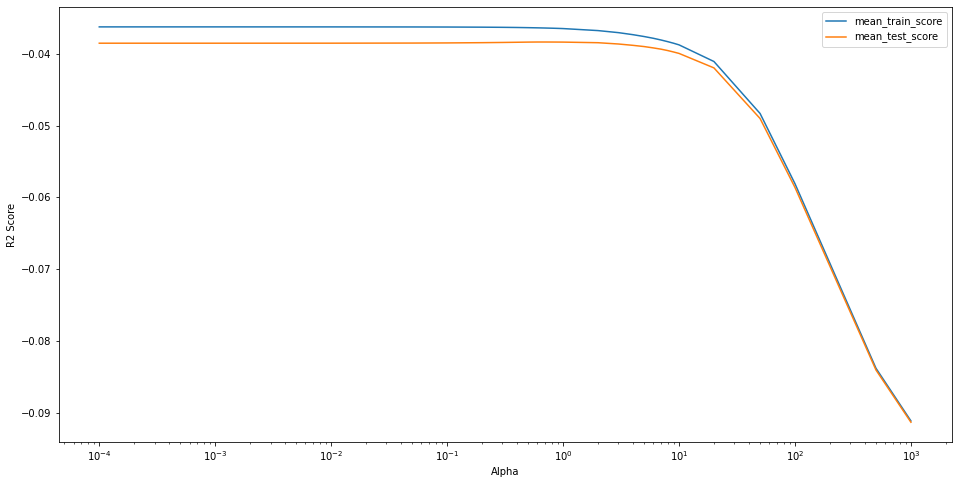

In [125]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'],label = 'mean_train_score')
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'],label = 'mean_test_score')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [126]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.7}

In [127]:
ridge = Ridge(alpha = model_cv.best_params_['alpha'])
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8581486882585672
0.8495751764626909


In [128]:
model_parameter = list(ridge.coef_)
model_parameter.append(ridge.intercept_)
cols = list(X_train.columns)
cols.append('constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [129]:
ridge_coef.sort_values(by='Coef',ascending=False).head(60)

Feature      Coef
2              GrLivArea  0.350215
1               BsmtQual  0.113416
5             GarageArea  0.111225
23  Neighborhood_StoneBr  0.094851
0              ExterQual  0.091288
22  Neighborhood_NridgHt  0.090706
4            KitchenQual  0.090426
21  Neighborhood_NoRidge  0.068935
20  Neighborhood_Crawfor  0.063344
33   Exterior1st_CemntBd  0.046374
18           MSZoning_FV  0.040788
8          MSSubClass_20  0.036135
15         MSSubClass_80  0.035752
34   Exterior2nd_Brk Cmn  0.033562
16         MSSubClass_85  0.031780
12         MSSubClass_60  0.022649
19           MSZoning_RL  0.020701
29     HouseStyle_1.5Unf  0.014305
26       Condition2_RRNn  0.009829
9          MSSubClass_30  0.005228
10         MSSubClass_40 -0.000906
17         MSSubClass_90 -0.001873
13         MSSubClass_70 -0.002476
11         MSSubClass_50 -0.003801
28       BldgType_TwnhsE -0.009987
32    Exterior1st_CBlock -0.010071
6             GarageCond -0.010177
25       Condition2_Norm -0.010858
24      Condition2_Feedr -0.015879
7         MSSubClass_190 -0.018152
30     HouseStyle_2.5Fin -0.022170
14         MSSubClass_75 -0.032640
35          Heating_OthW -0.047166
31      RoofMatl_WdShake -0.058281
27        BldgType_Twnhs -0.059107
3           BedroomAbvGr -0.065260
36              constant -0.084463